In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./data/dates/2021-02-26.csv')
print("size of data frame: ", df.shape)
df.head()

size of data frame:  (496, 497)


,Unnamed: 0,ticker,ma50,ma200,ADX,ADXR,AROONOSC,stochK,stochD,TRIX,...,PriceUp-10,Close Change-10,Open Change-10,High Change-10,Low Change-10,Target-10,AD_difference-10,AD_RATIO-10,mcclellanSUM-10,mcclellanOSC-10
0,0,AAPL,1.961676,-2.082840,25.326656,19.489429,-64.285714,-0.973010,-0.853181,-0.584259,...,-1,-0.001920,-0.004250,-0.004380,-0.004687,0,-64,0.771429,602.373178,3.645657
1,1,MSFT,-1.730078,-1.763326,29.811205,30.235503,-50.000000,-1.414065,-1.617590,0.669222,...,-1,0.006878,-0.000898,-0.003131,0.005231,0,-64,0.771429,602.373178,3.645657
2,2,AMZN,-0.177018,-2.349526,17.848522,17.726770,-100.000000,-1.253995,-1.233882,-0.363431,...,-1,-0.007439,-0.006638,-0.007821,-0.001825,0,-64,0.771429,602.373178,3.645657
3,3,TSLA,1.570392,-1.999187,30.490075,29.836180,-71.428571,-0.095495,-0.211882,0.076151,...,-1,0.008499,-0.036983,-0.017684,0.002137,0,-64,0.771429,602.373178,3.645657
4,4,META,-1.194844,-1.581113,10.945183,12.482784,-50.000000,-1.266356,-1.016499,-1.736859,...,-1,-0.005444,-0.002055,-0.000804,0.002876,0,-64,0.771429,602.373178,3.645657


In [3]:

# path = "c:/users/roeym/desktop/backtrade/dates/*.csv"
# dates =[]
# for fname in glob.glob(path):
#     dates.append(fname.split('/')[5].split(".")[0][6:])
# for date in dates:
#     df = pd.read_csv(f"{date}.csv")
#     df.drop(df.columns[[1,2,3,4]], axis=1)
#     print(df)
#     exit()

In [4]:
### prints all hists of columns
# cols = df.columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.hist(df[col], bins = 30)
#         plt.show()

In [5]:
### prints boxplot of all columns
# for col in cols:
#     if "CDL" not in col and "Date" not in col and "ticker" not in col:
#         print(col)
#         plt.boxplot(df[col])
#         plt.show()

### takes specificly needed columns

In [6]:
df = df.loc[:, 'ma50':'Target']
df.head()

,ma50,ma200,ADX,ADXR,AROONOSC,stochK,stochD,TRIX,ULTOSC,MACD,...,VXN,Market Cap,DPC,Cumulative Return,PriceUp,Close Change,Open Change,High Change,Low Change,Target
0,1.961676,-2.082840,25.326656,19.489429,-64.285714,-0.973010,-0.853181,-0.584259,48.329519,-2.539516,...,34.060001,2.469434,-1.186473,-0.979661,-1,0.002232,-0.016763,-0.012731,0.005475,0
1,-1.730078,-1.763326,29.811205,30.235503,-50.000000,-1.414065,-1.617590,0.669222,51.931309,1.451664,...,34.060001,1.388553,-0.360008,-1.428405,-1,0.014804,-0.002370,0.003325,0.007284,0
2,-0.177018,-2.349526,17.848522,17.726770,-100.000000,-1.253995,-1.233882,-0.363431,44.214691,-1.509952,...,34.060001,0.391308,-0.977951,-1.121509,-1,0.011700,-0.013243,-0.017563,-0.003629,0
3,1.570392,-1.999187,30.490075,29.836180,-71.428571,-0.095495,-0.211882,0.076151,46.942711,-8.522327,...,34.060001,1.112050,-0.952977,0.959068,-1,-0.009850,-0.036012,-0.041386,-0.016508,0
4,-1.194844,-1.581113,10.945183,12.482784,-50.000000,-1.266356,-1.016499,-1.736859,44.029024,-2.073640,...,34.060001,0.617664,-1.419566,-2.086306,-1,0.011504,-0.022226,-0.005207,0.009565,0


## prints the mean, min , max and std of data as bar graph

helo


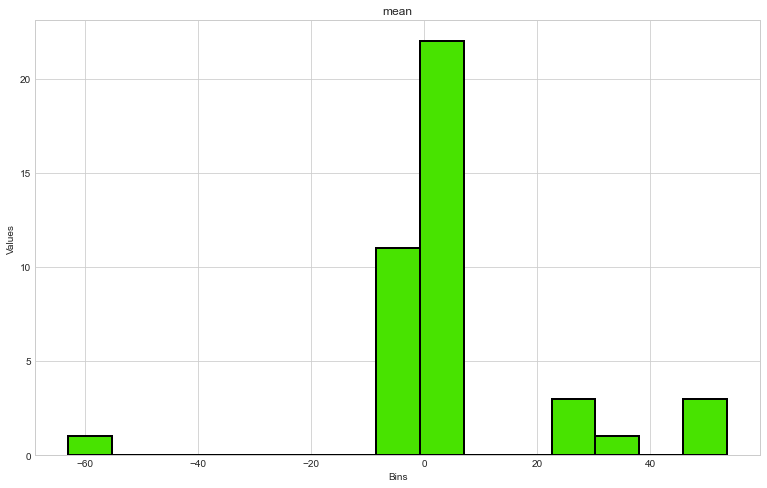

helo


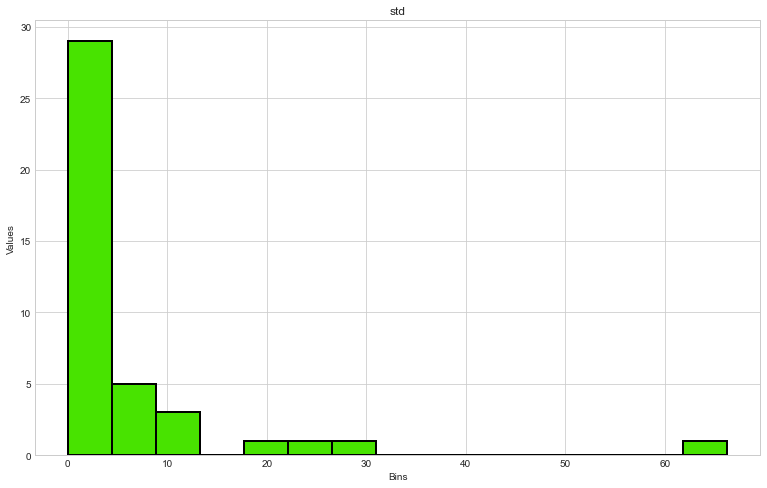

helo


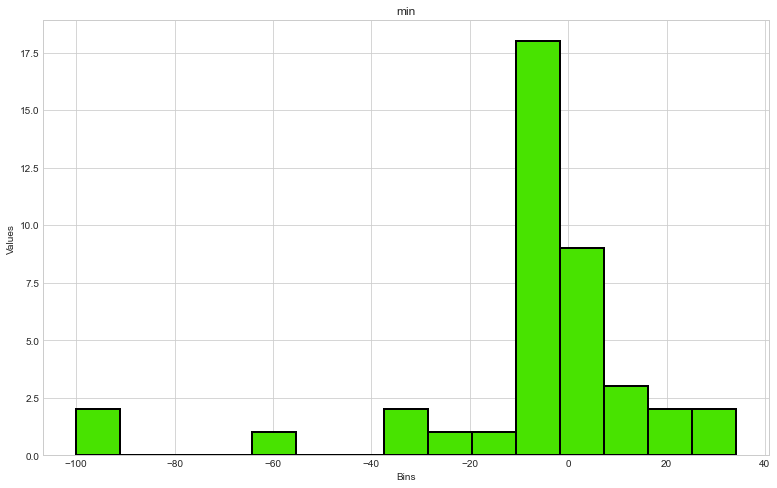

helo


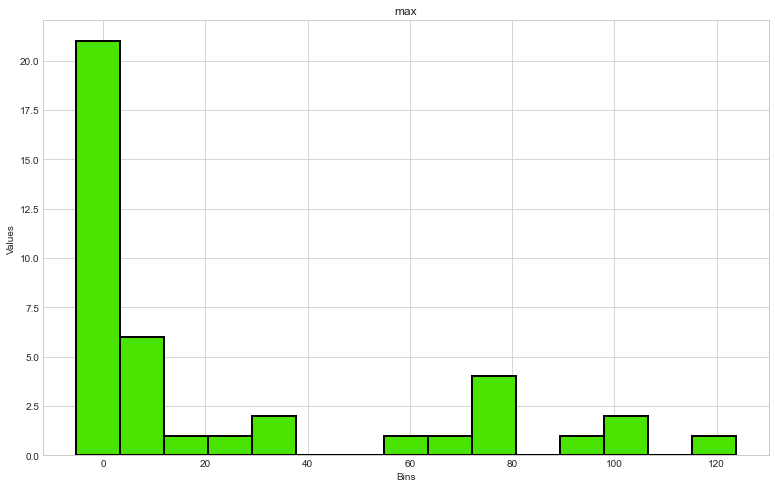

In [7]:
descdf = df.describe().T
descol = ['mean','std','min','max']
for col in descol:
    
    plt.figure(figsize=(13,8)) # Make it 14x7 inch
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.hist(descdf[col], bins=15, facecolor = '#48e300', edgecolor='#000000', linewidth=2)
    plt.title(col) 
    plt.xlabel('Bins') 
    plt.ylabel('Values') 
    plt.show()


## creates bar graphs for each used index to show variance in the data

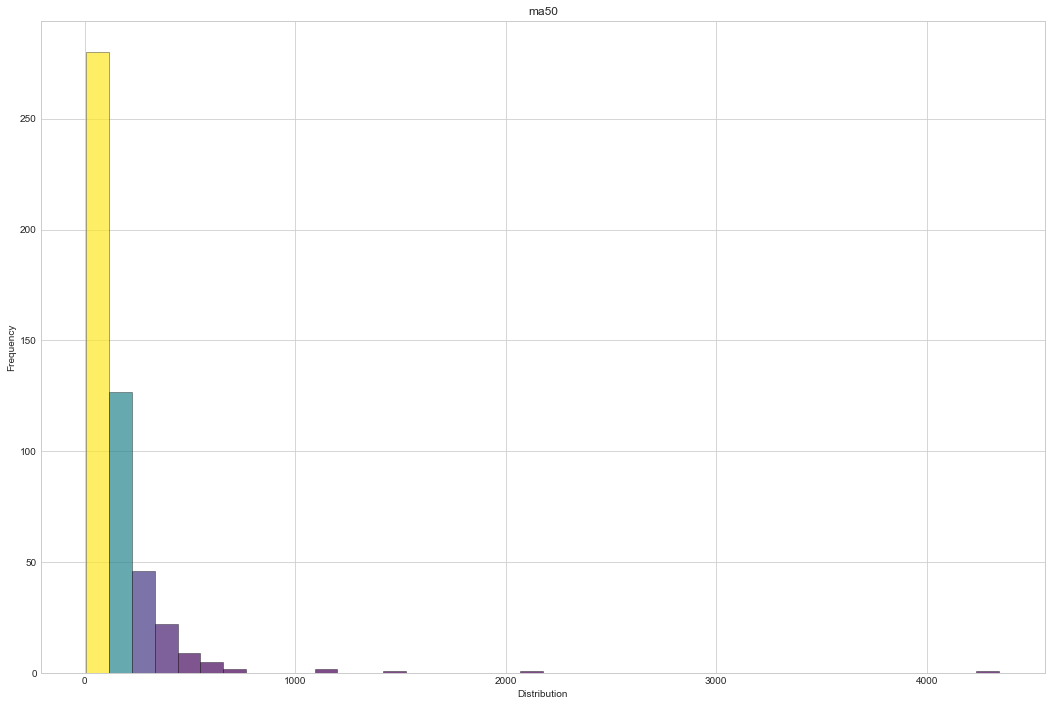

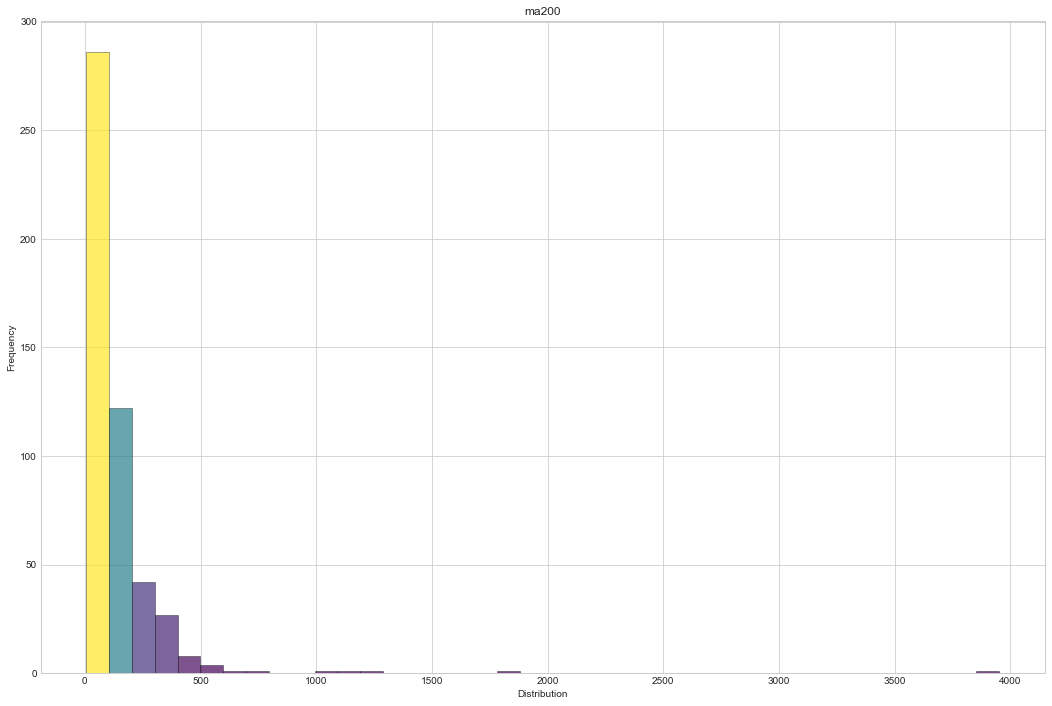

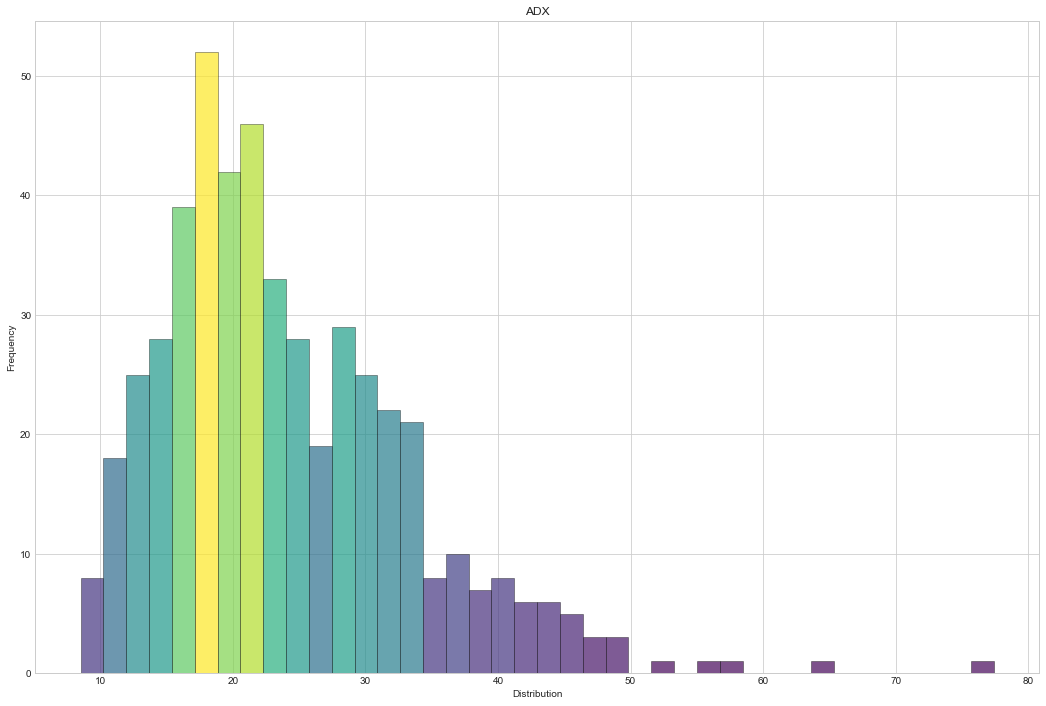

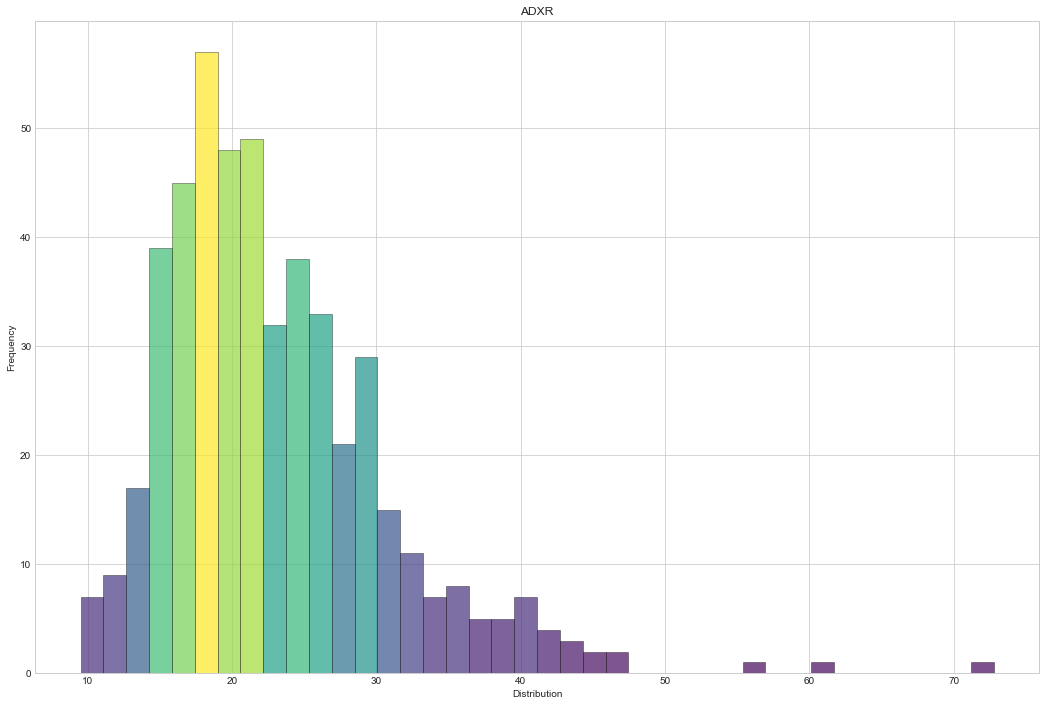

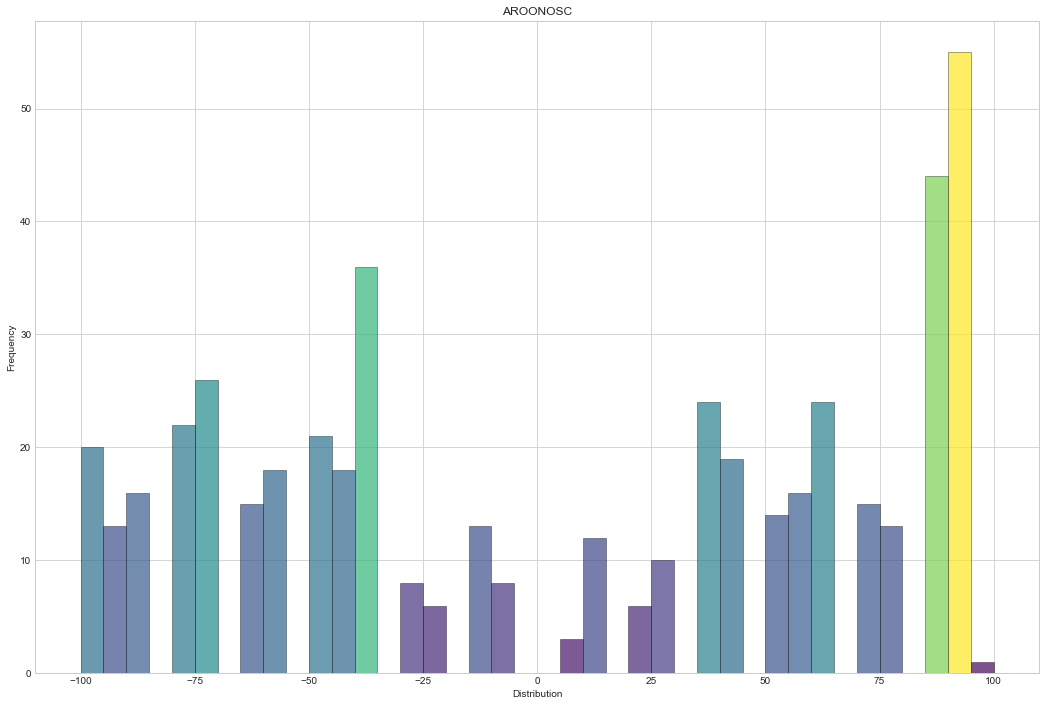

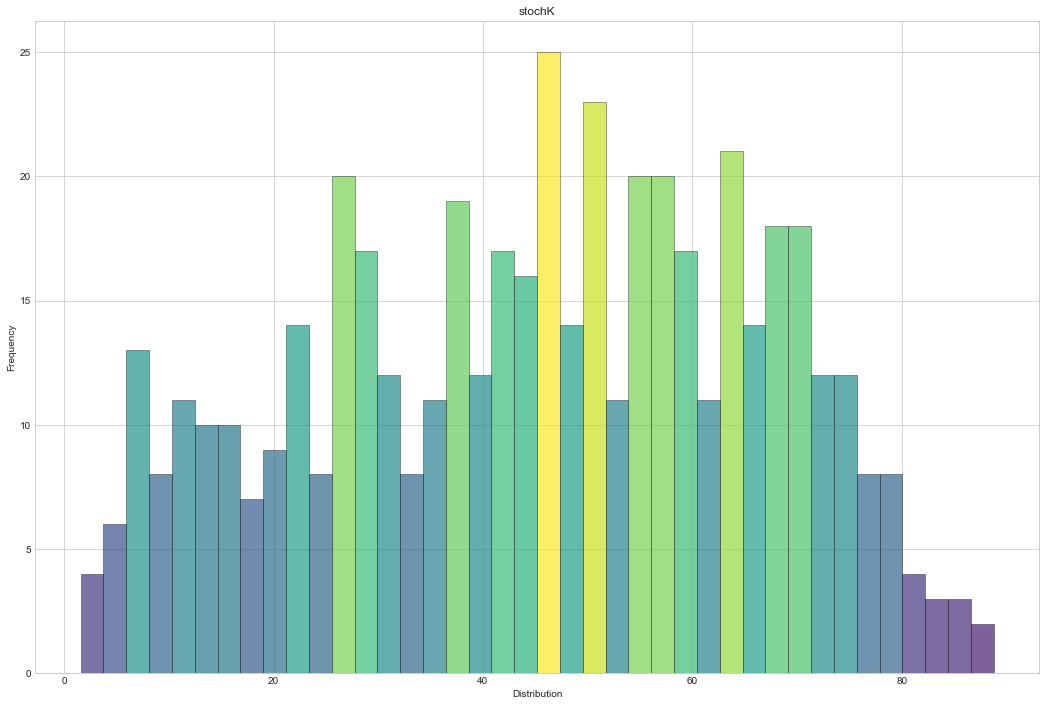

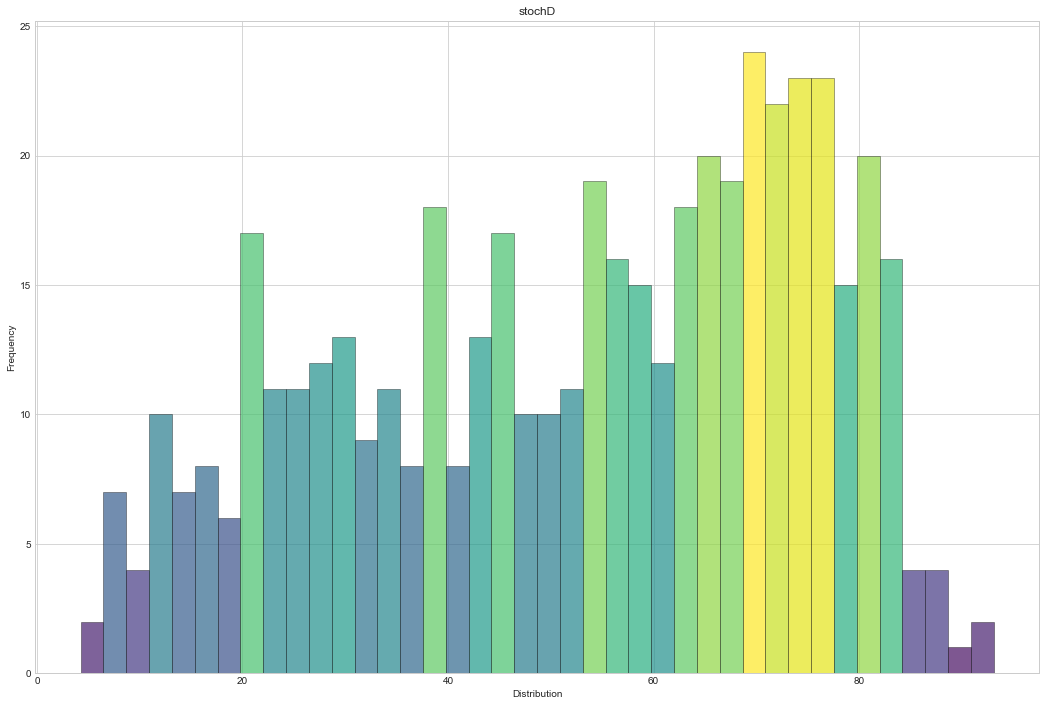

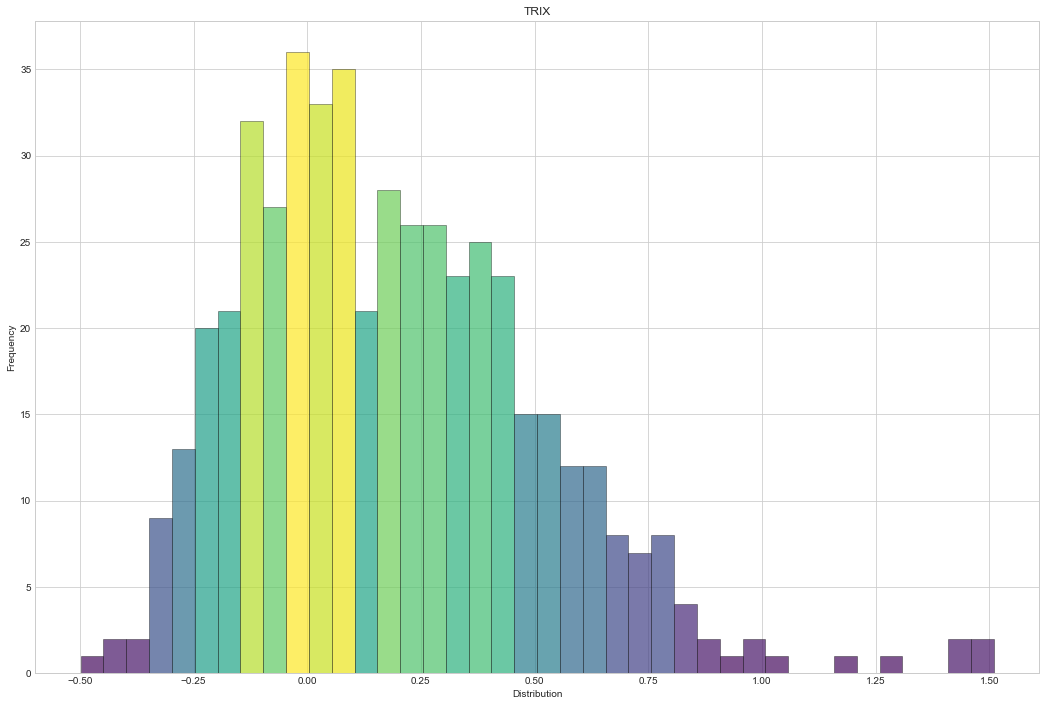

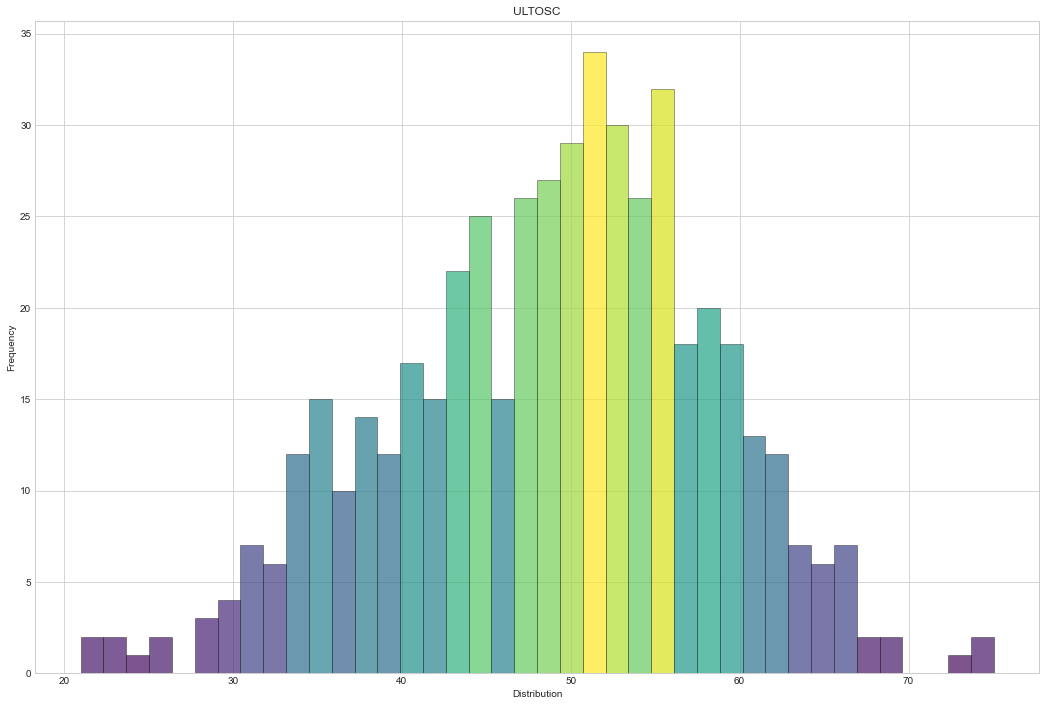

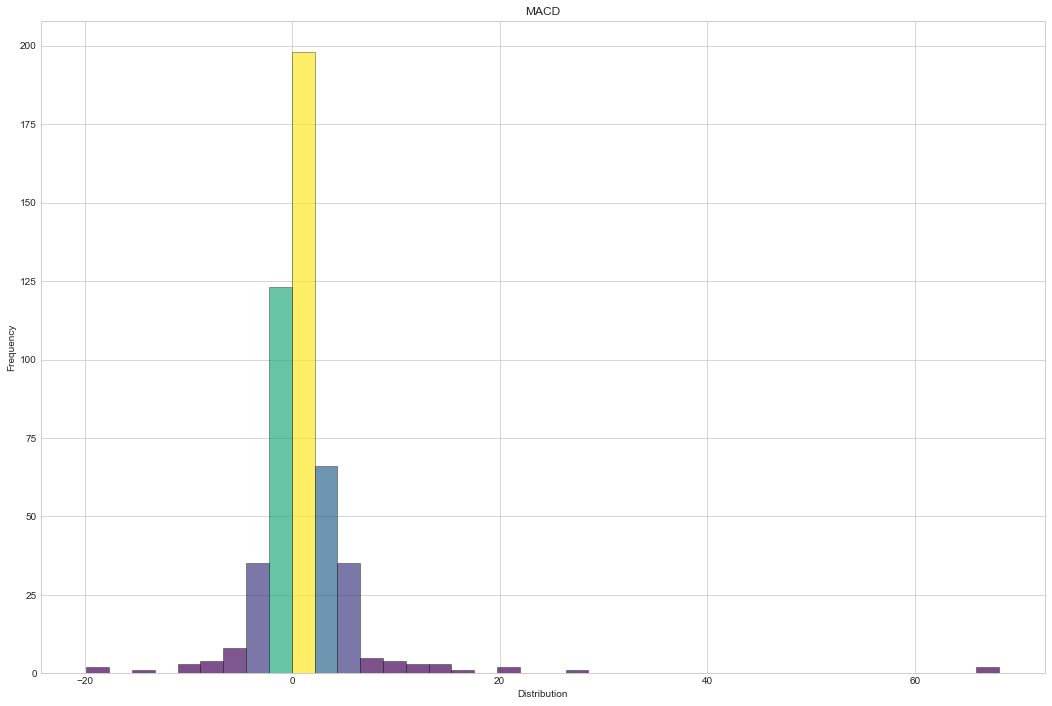

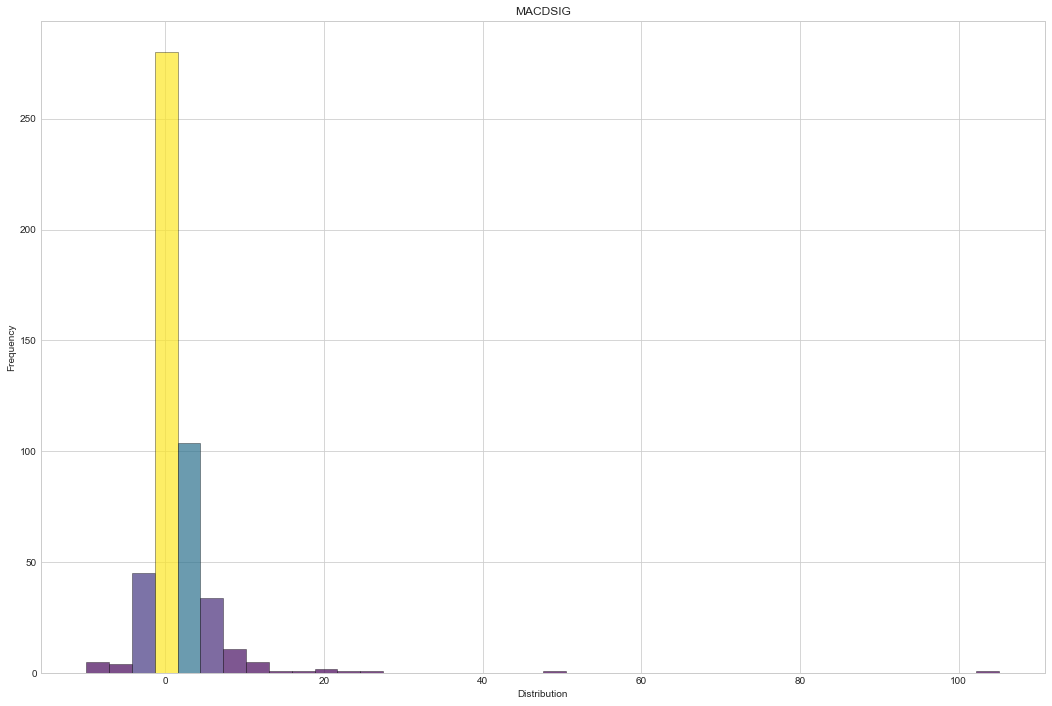

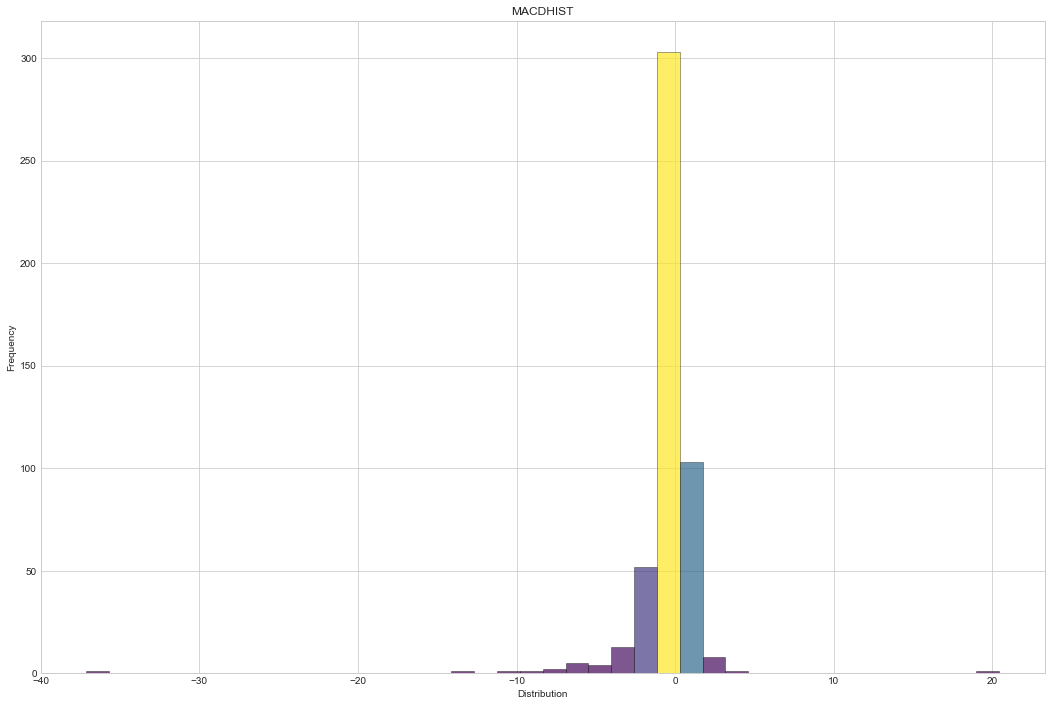

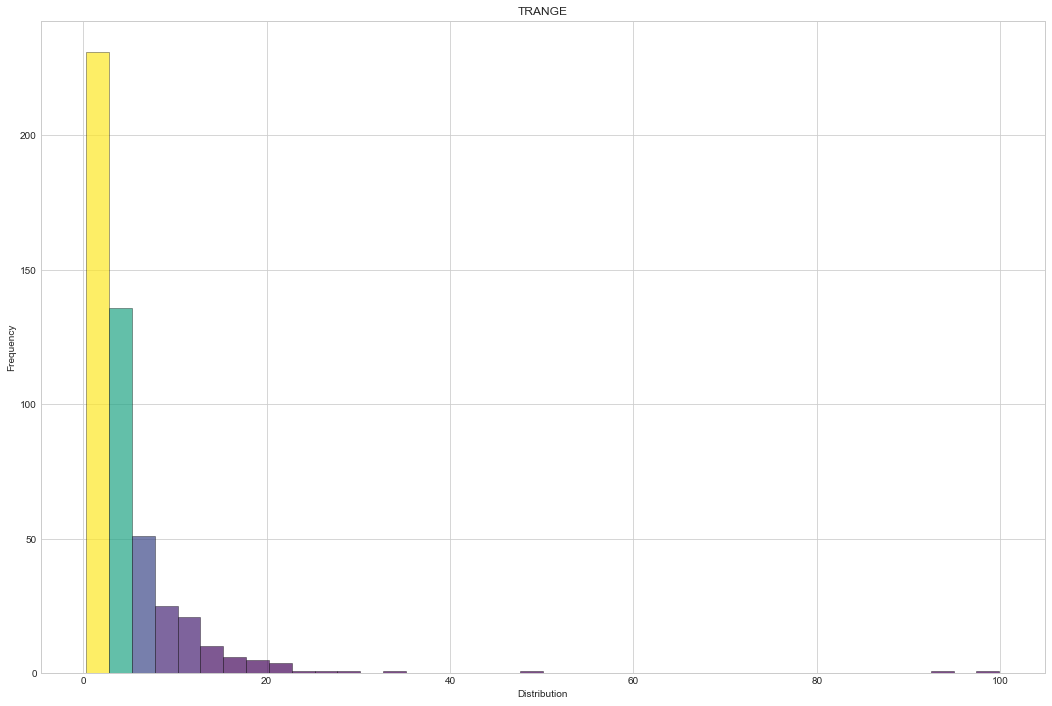

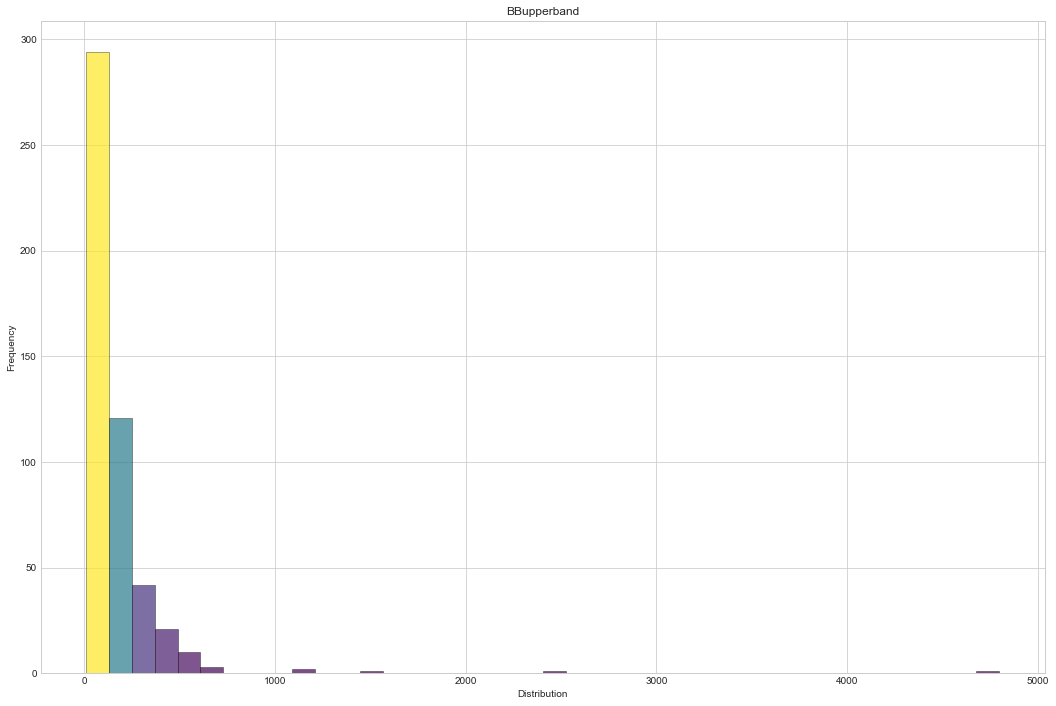

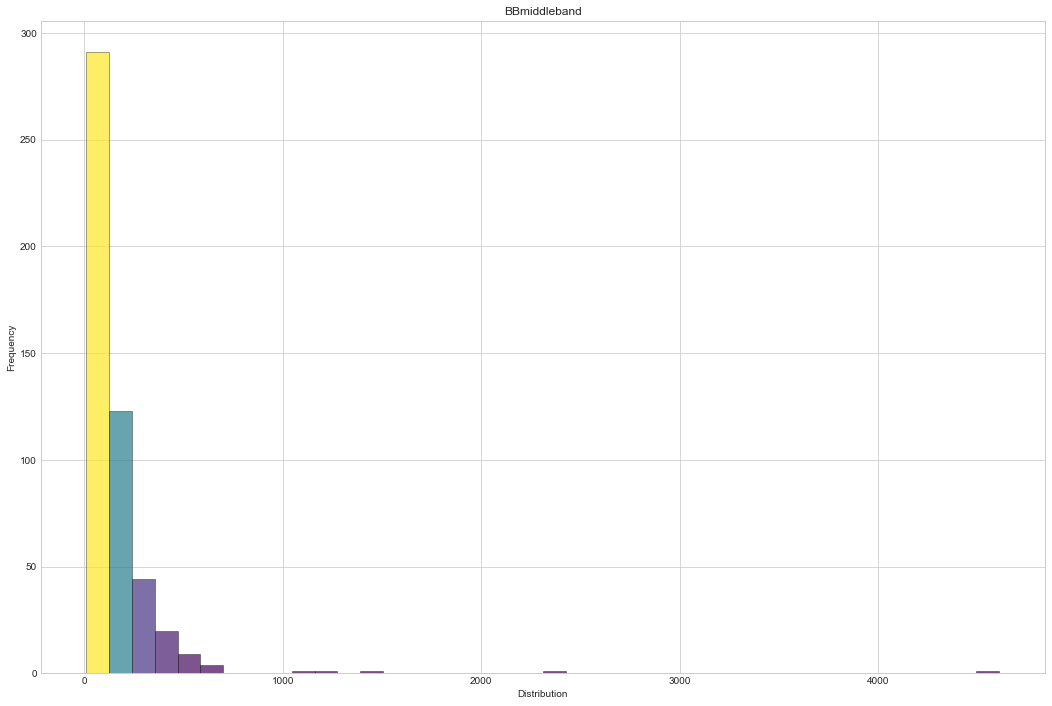

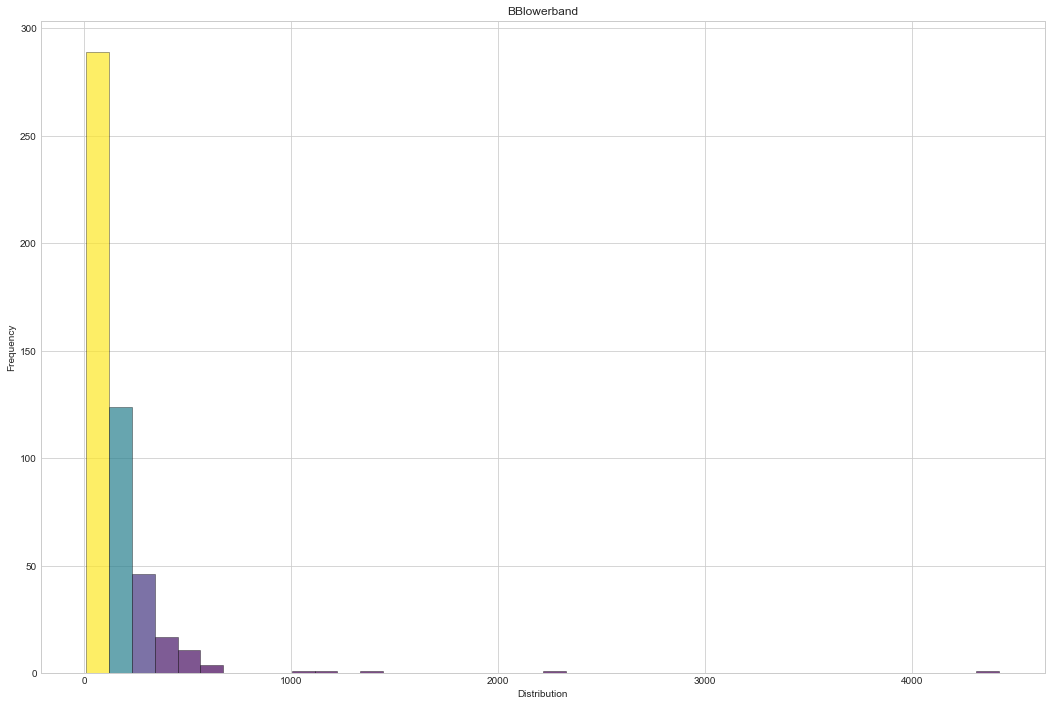

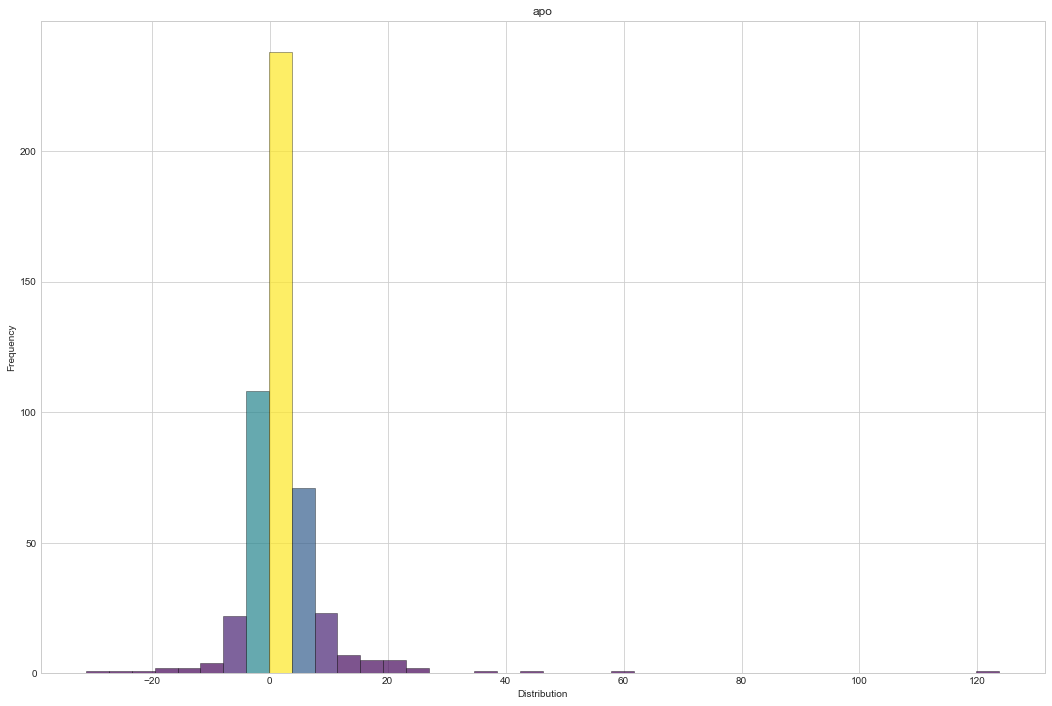

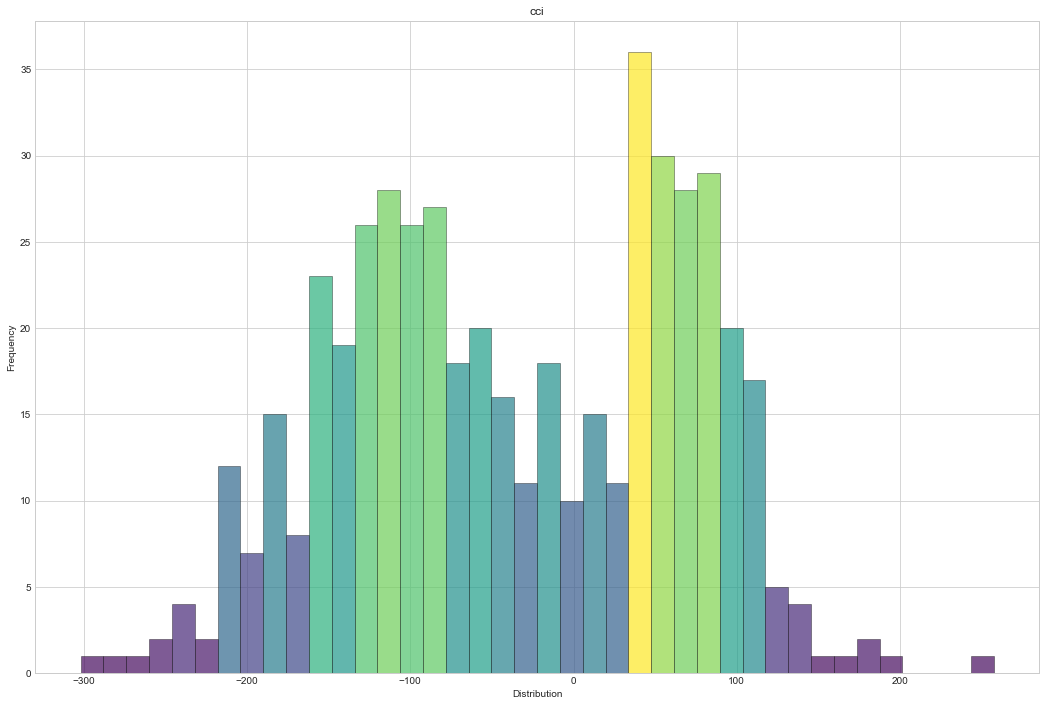

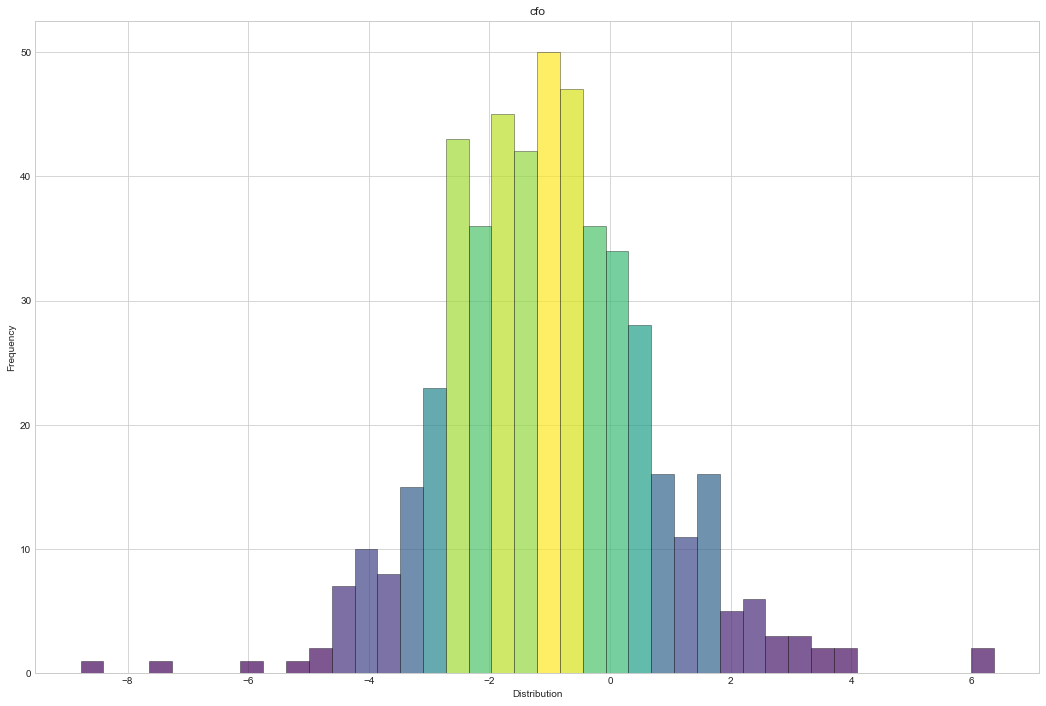

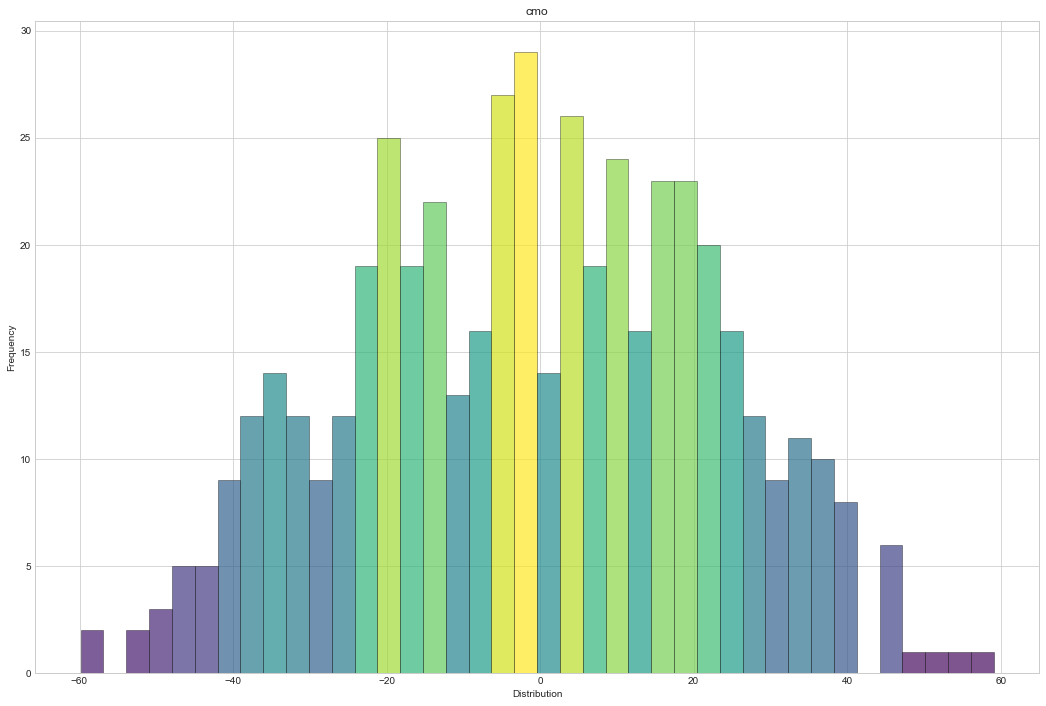

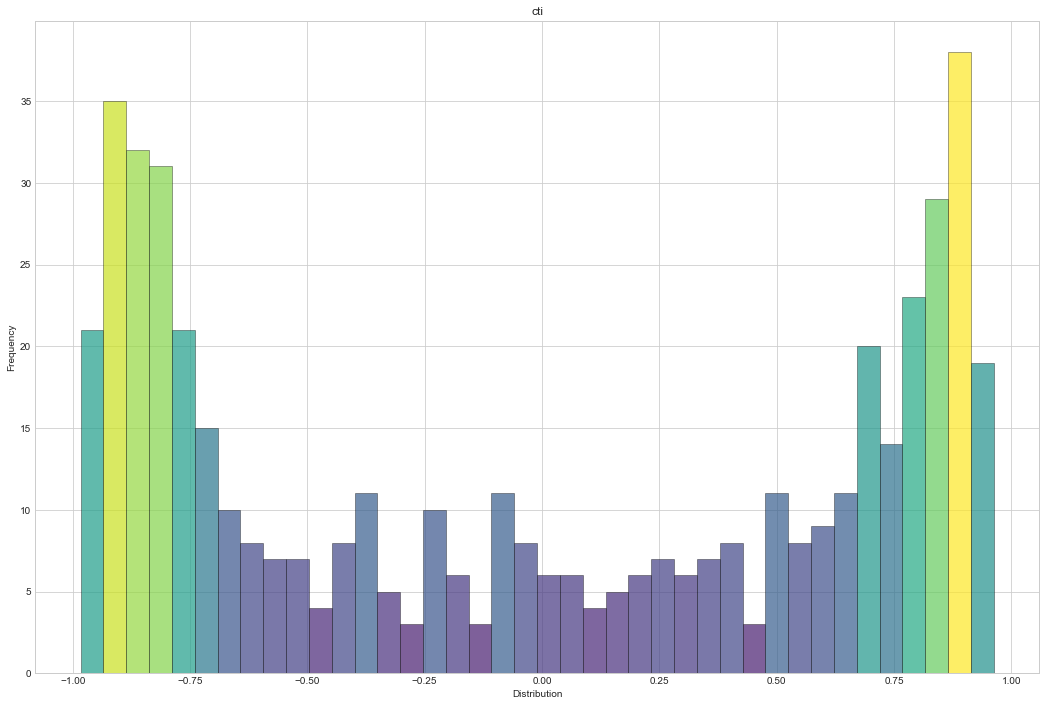

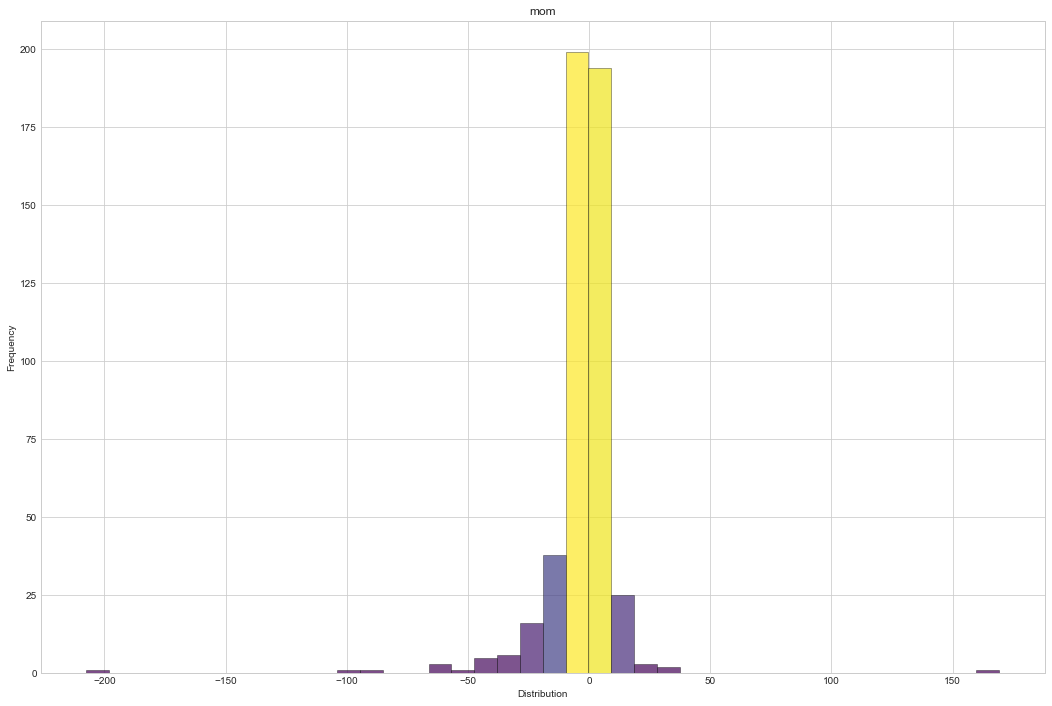

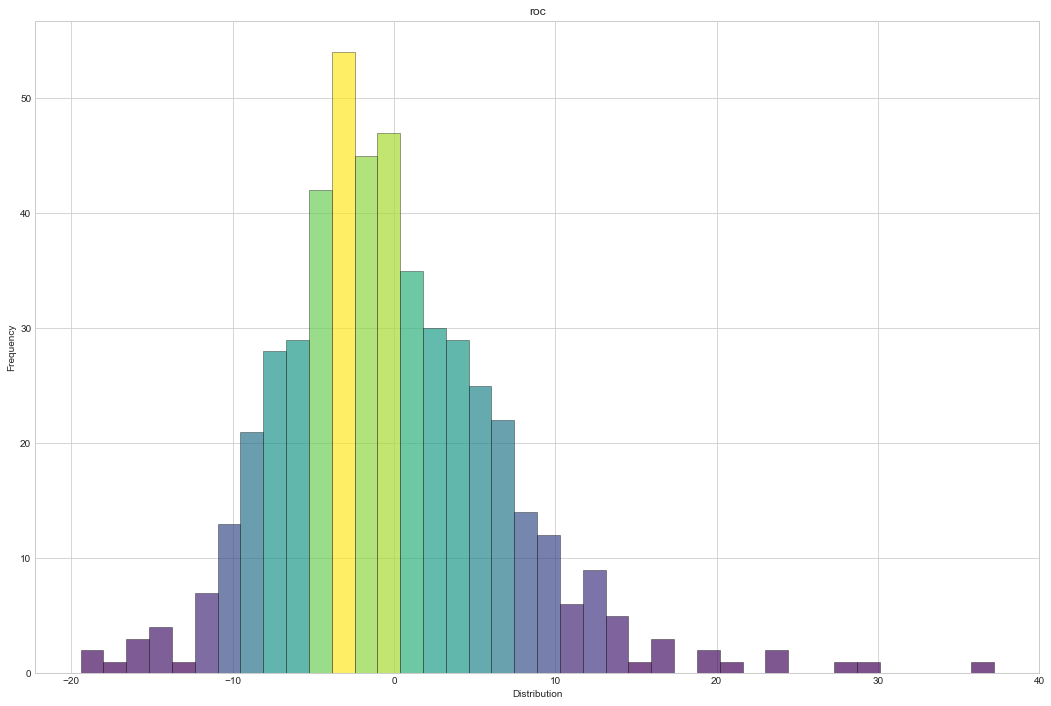

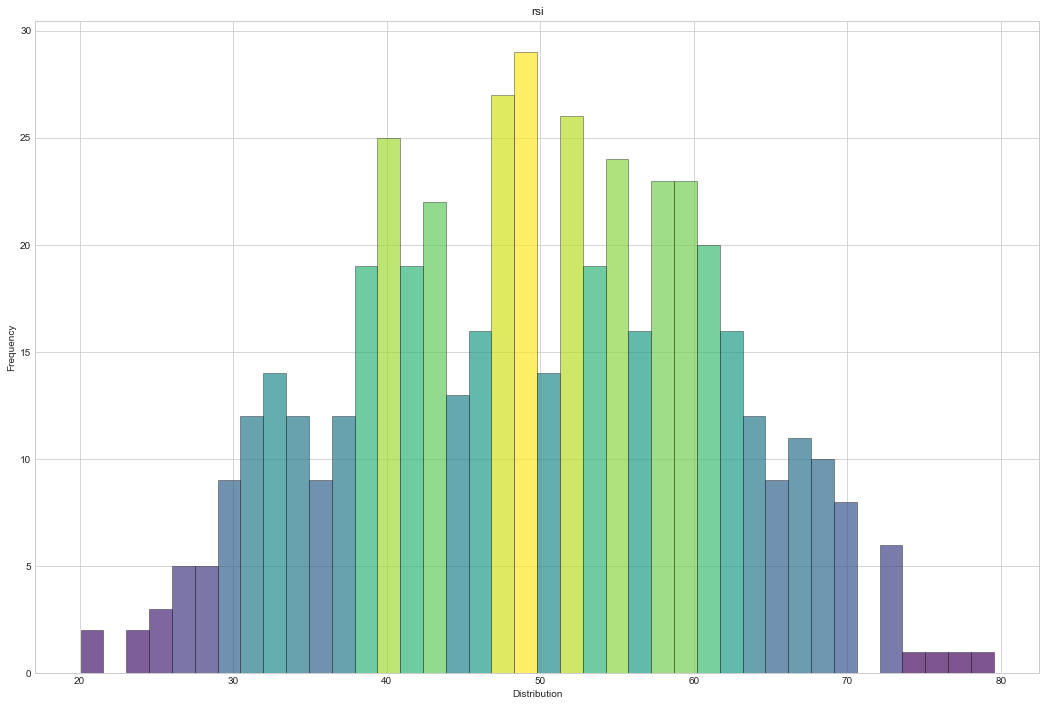

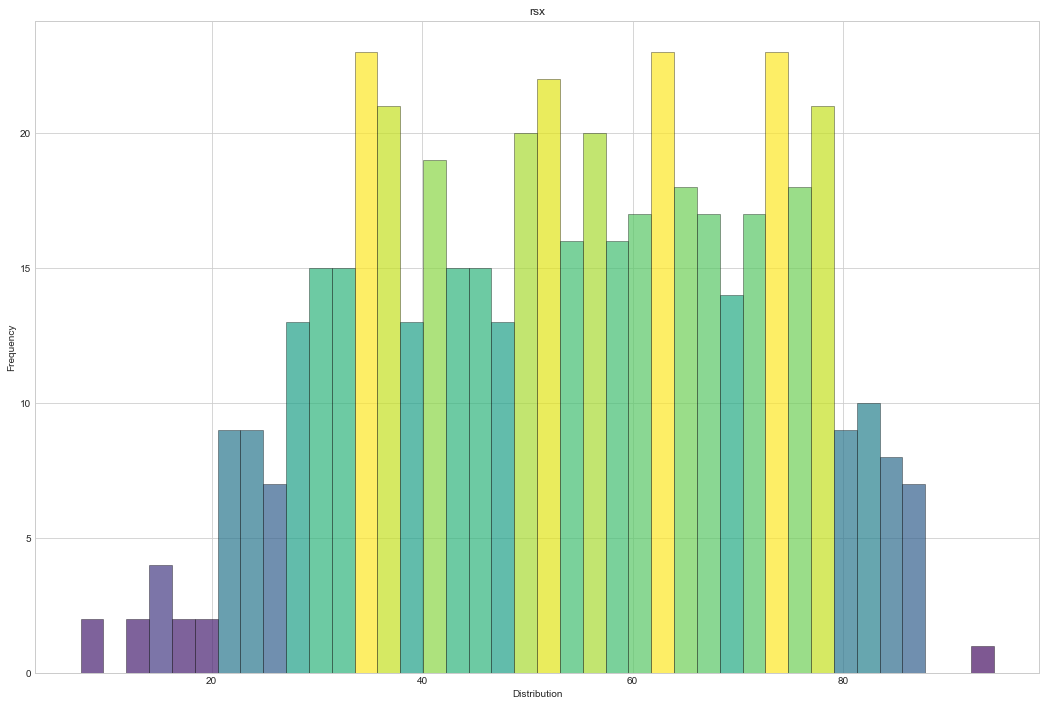

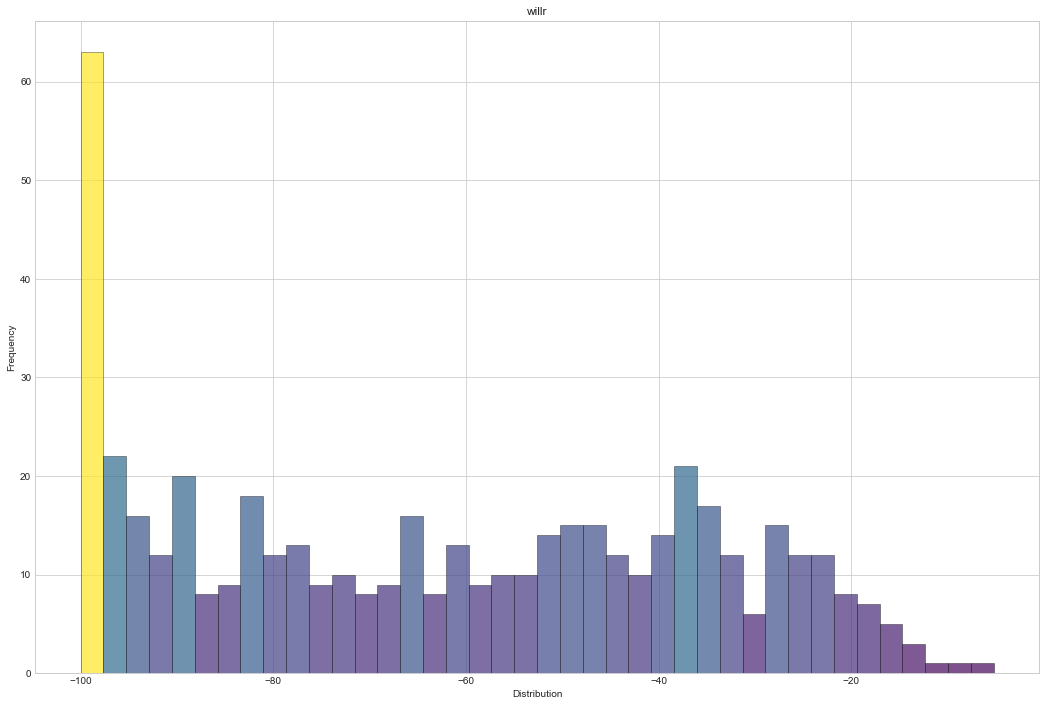

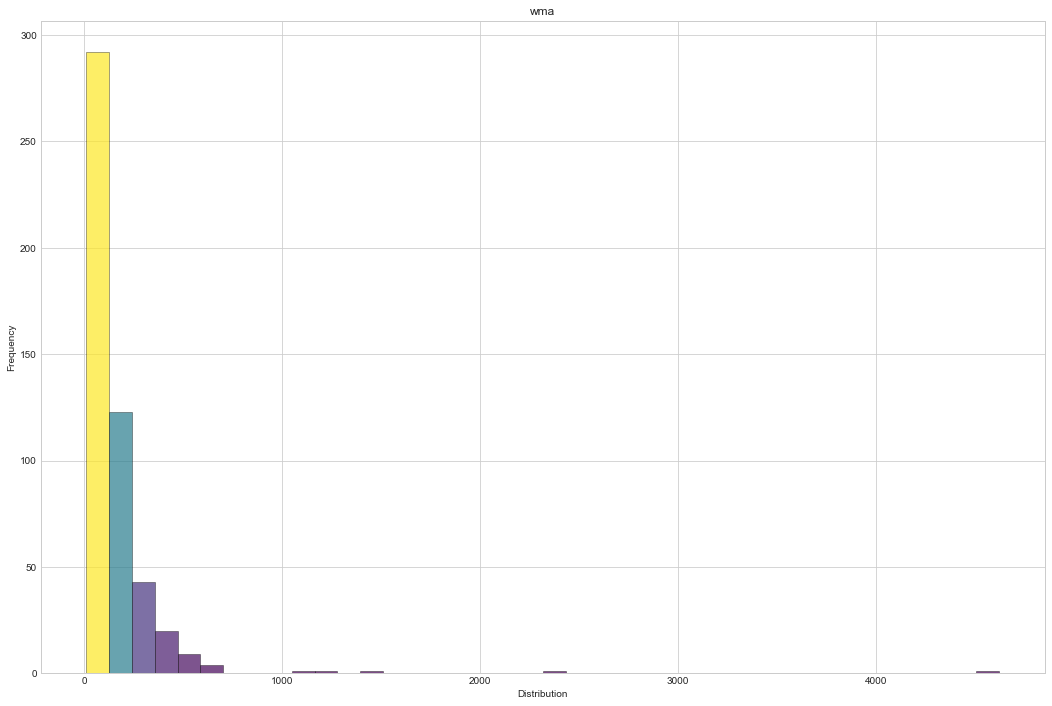

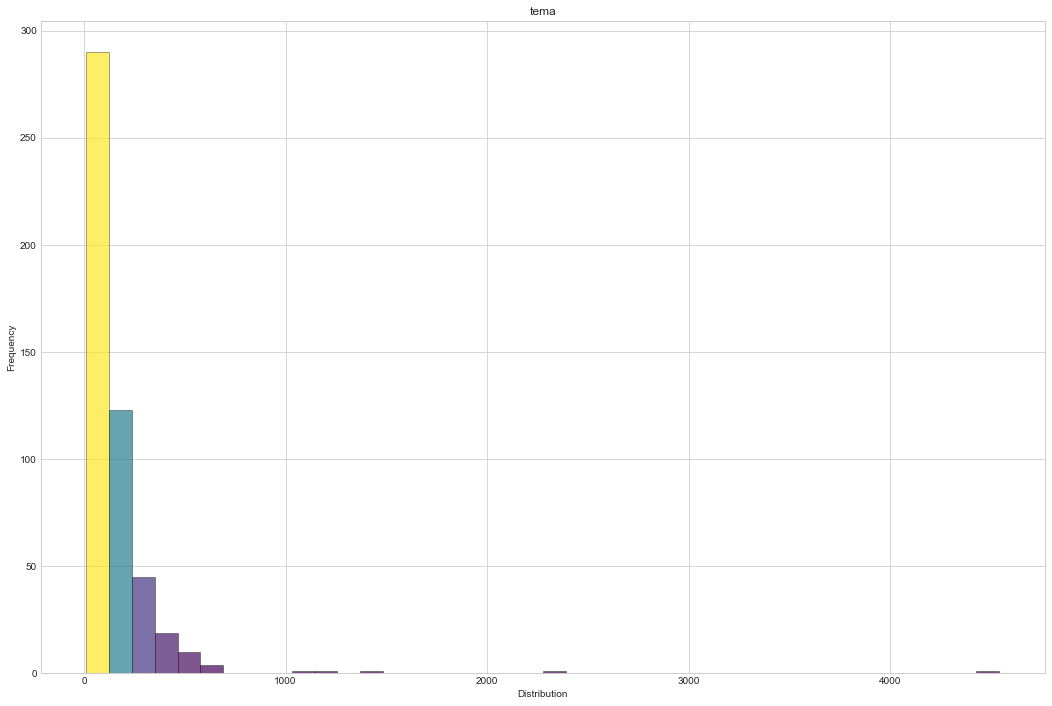

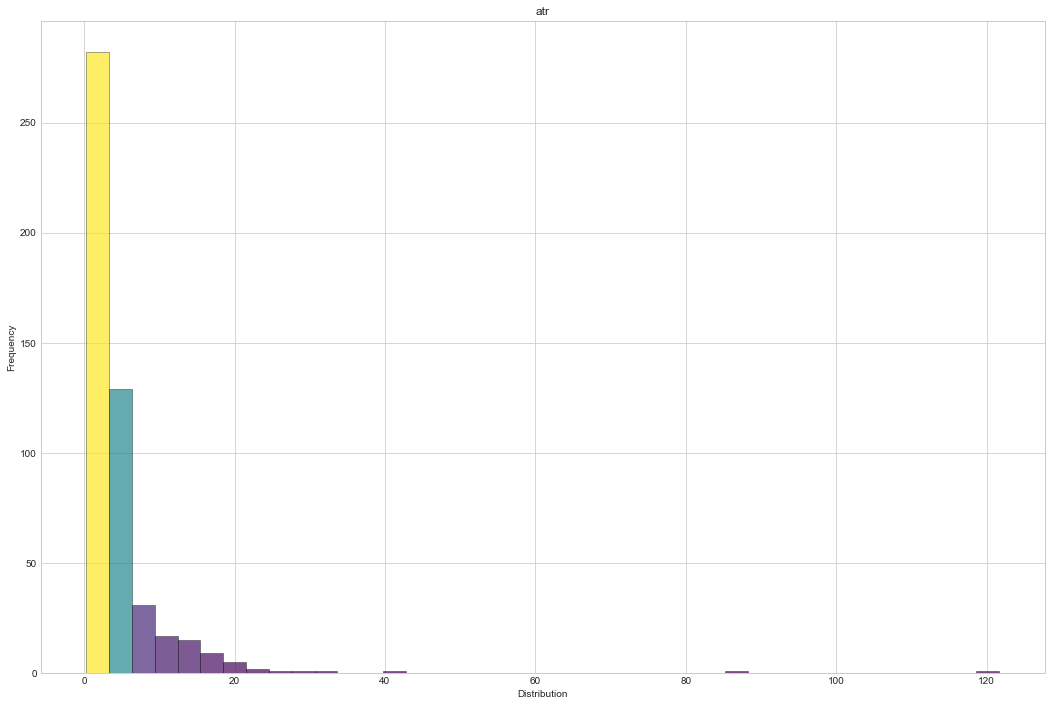

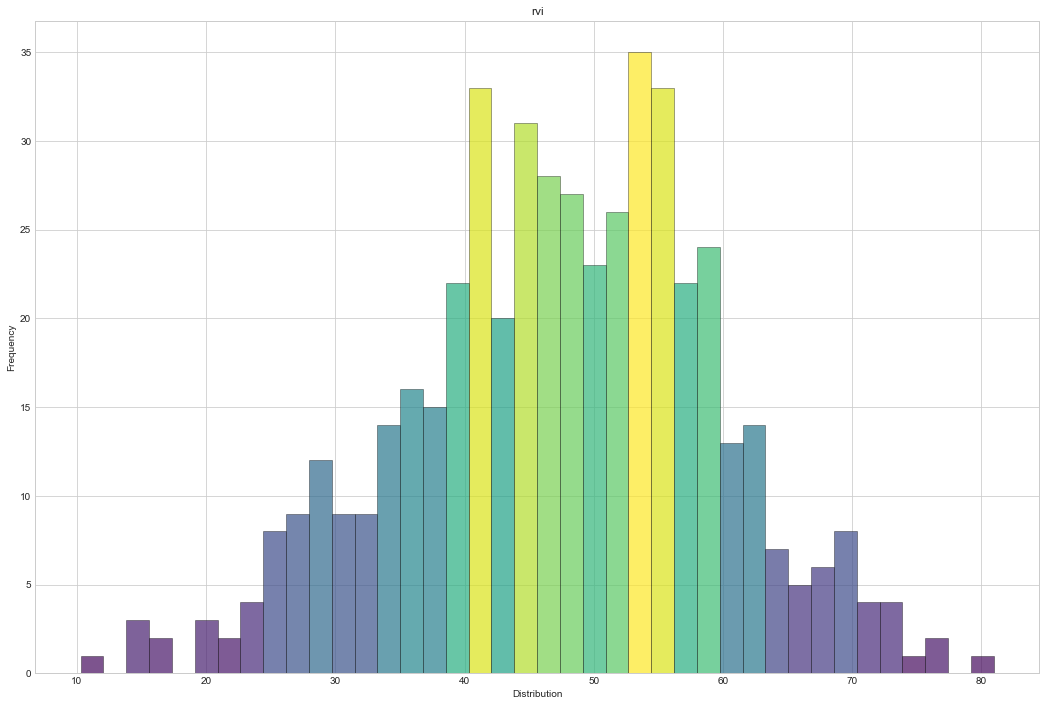

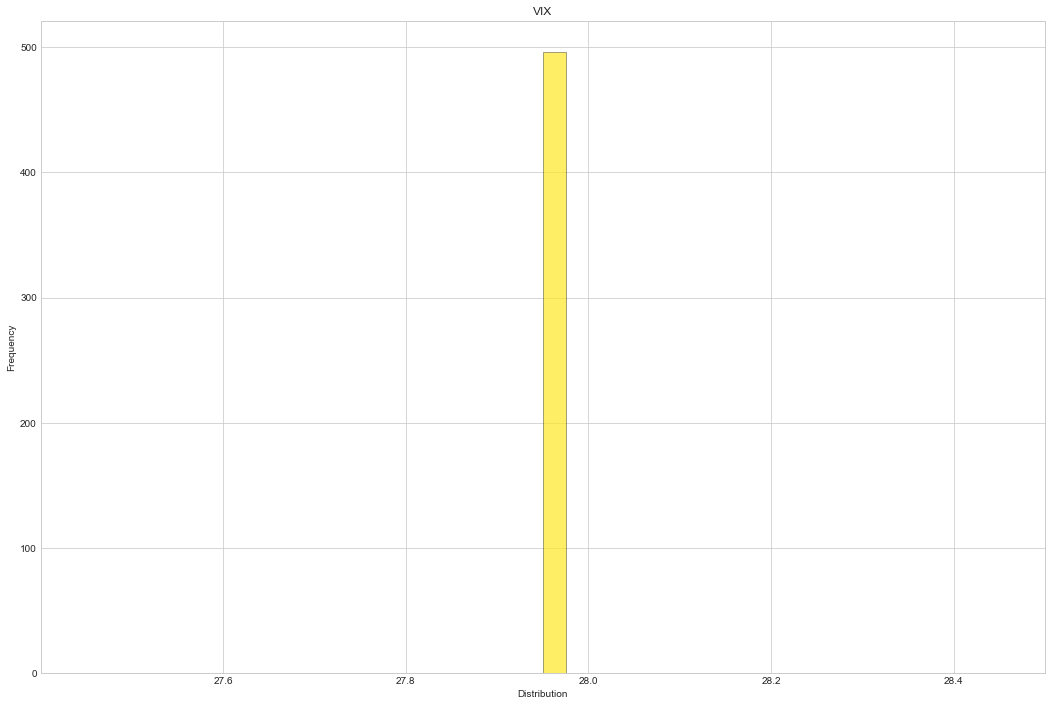

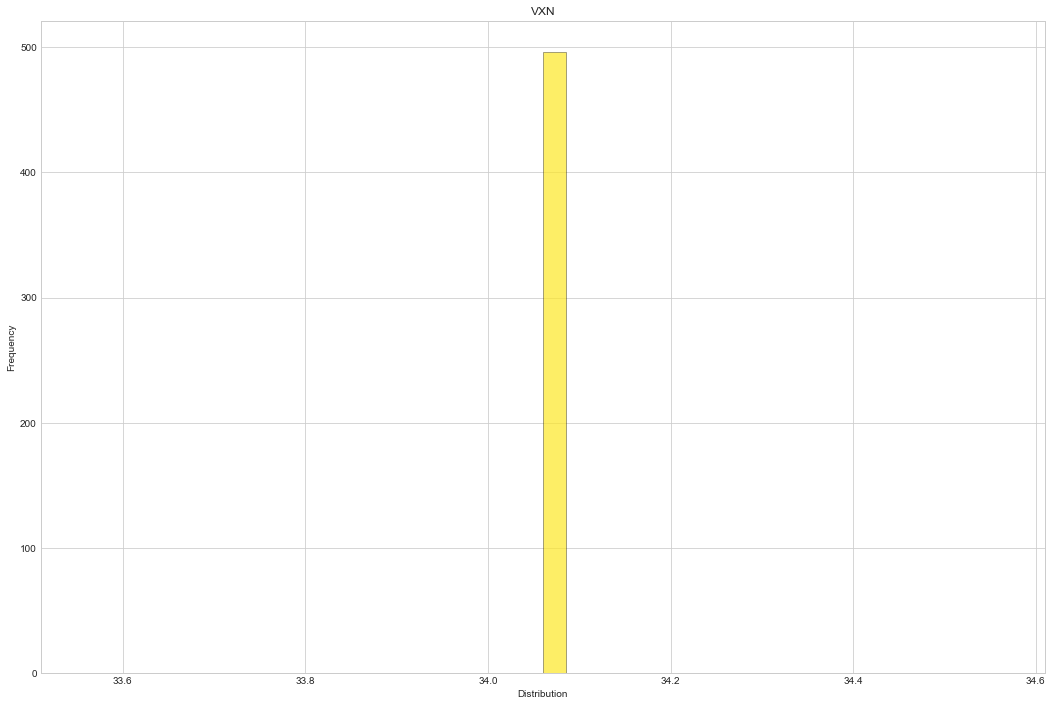

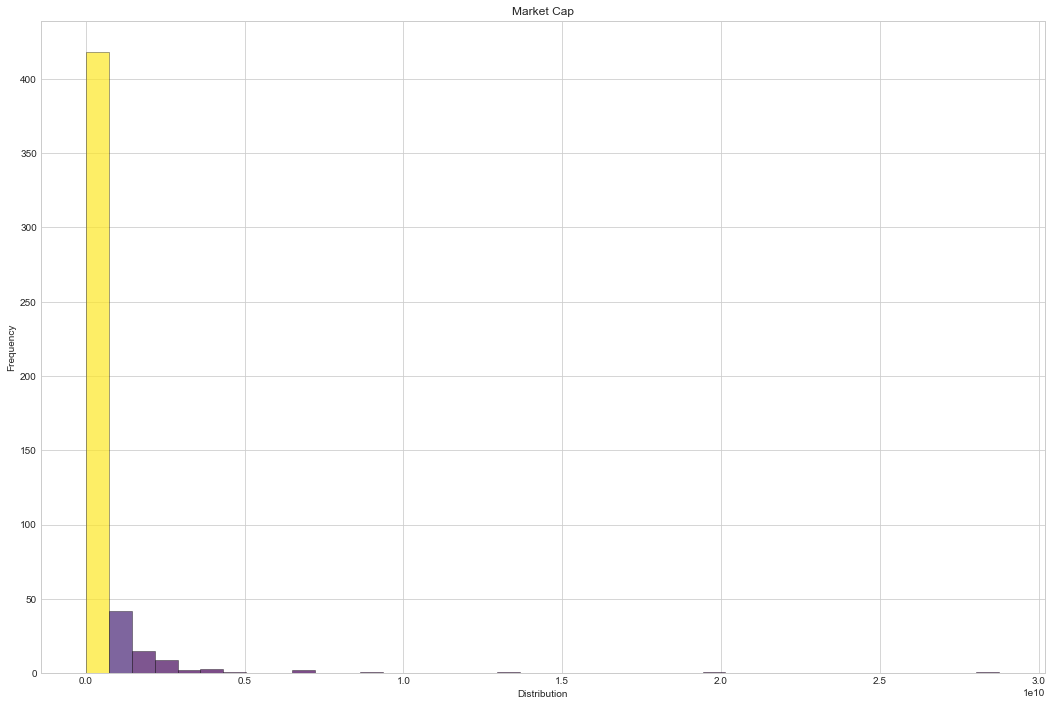

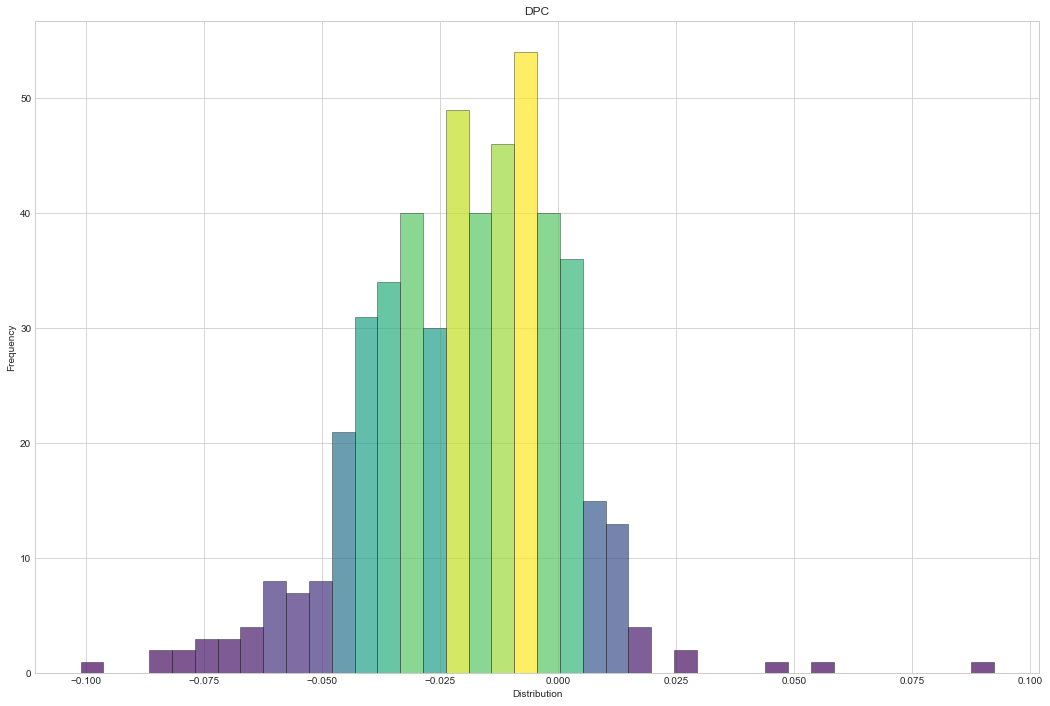

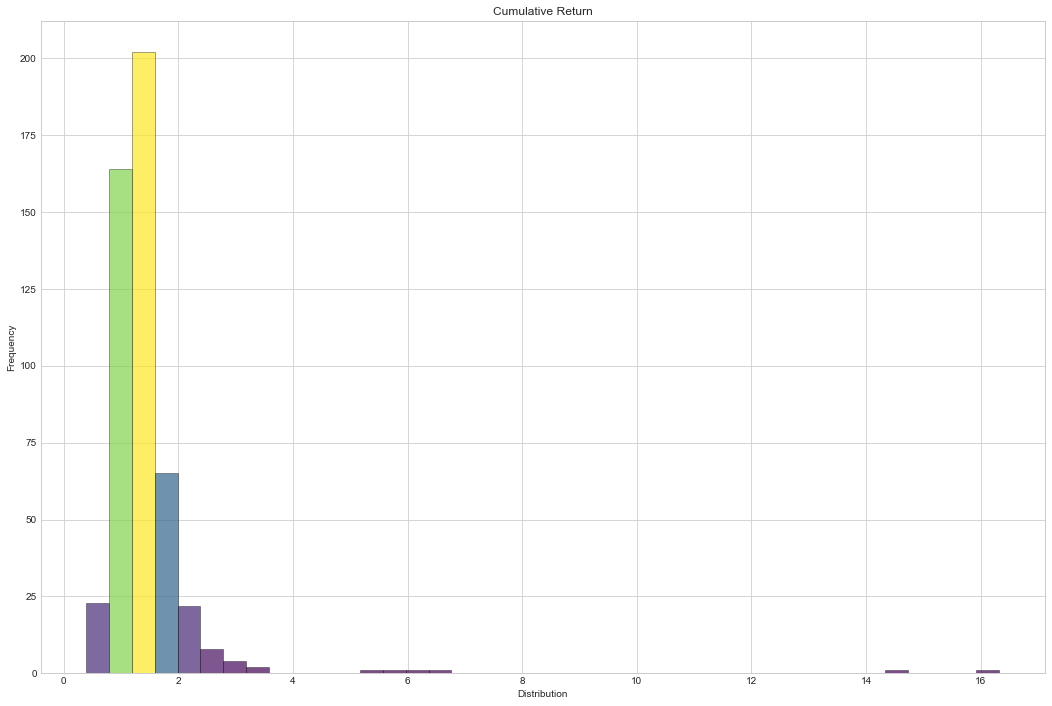

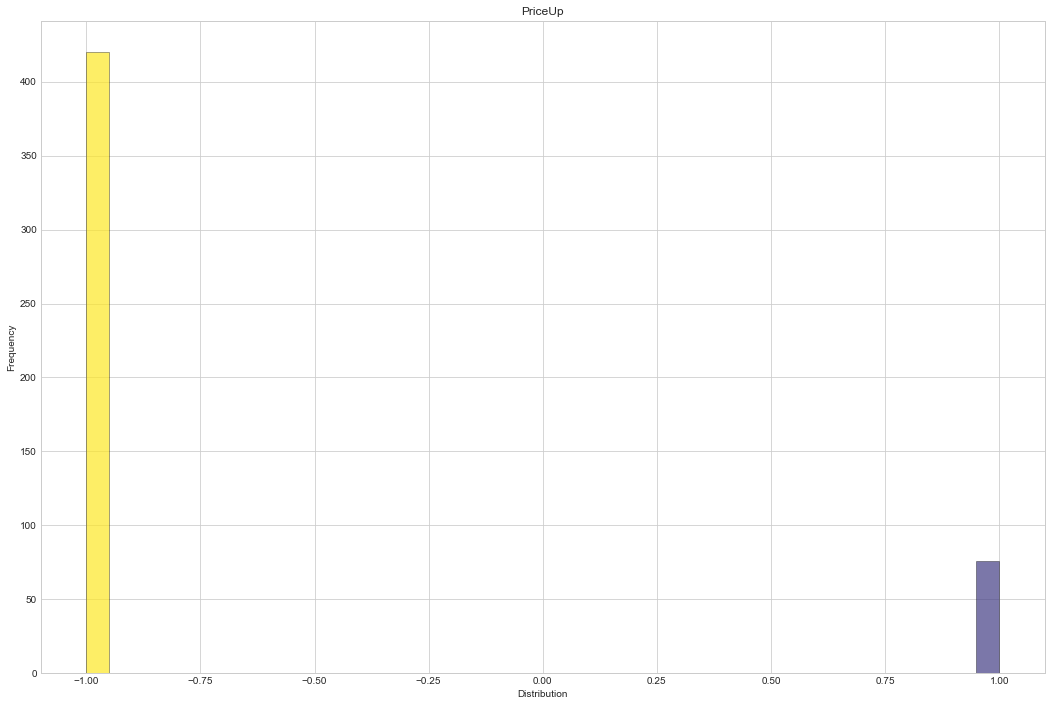

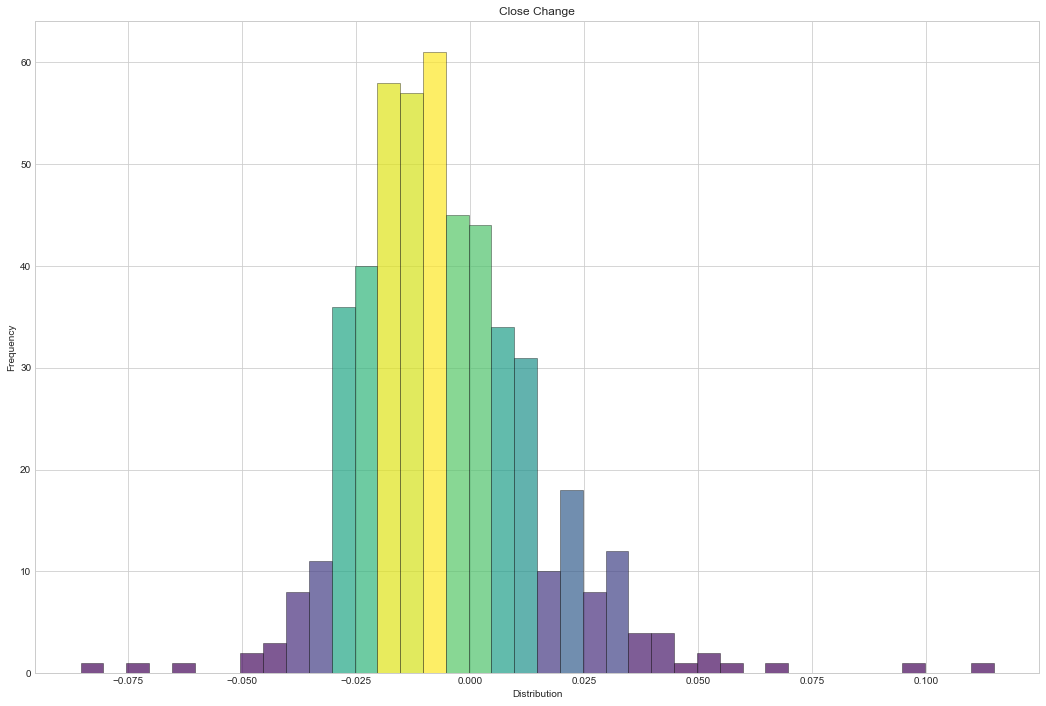

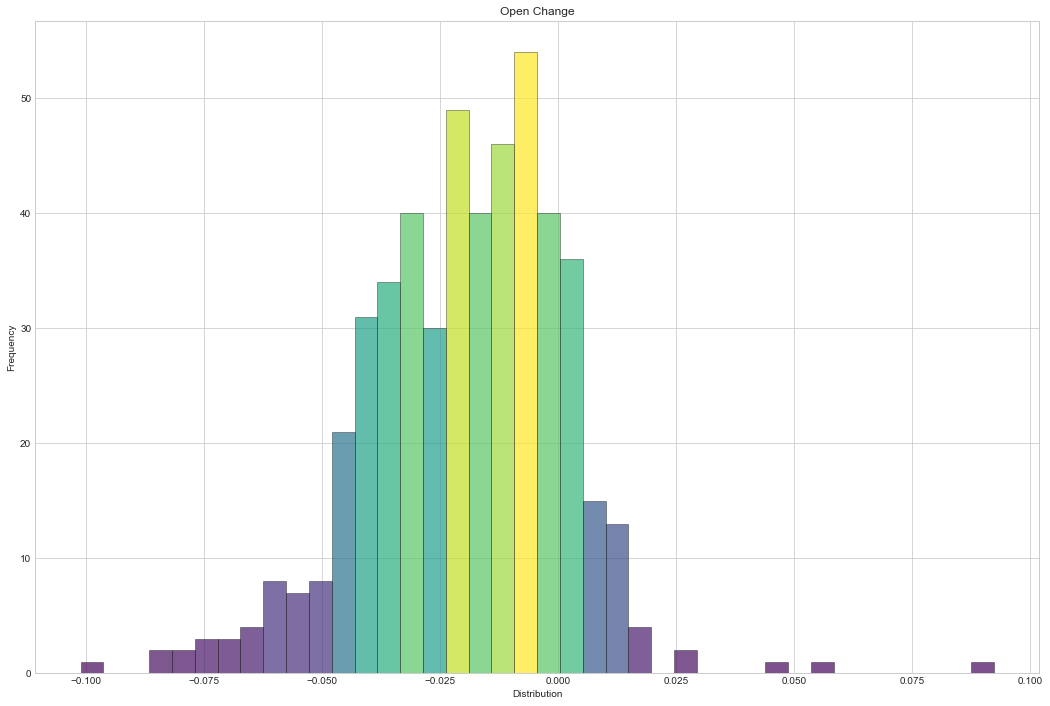

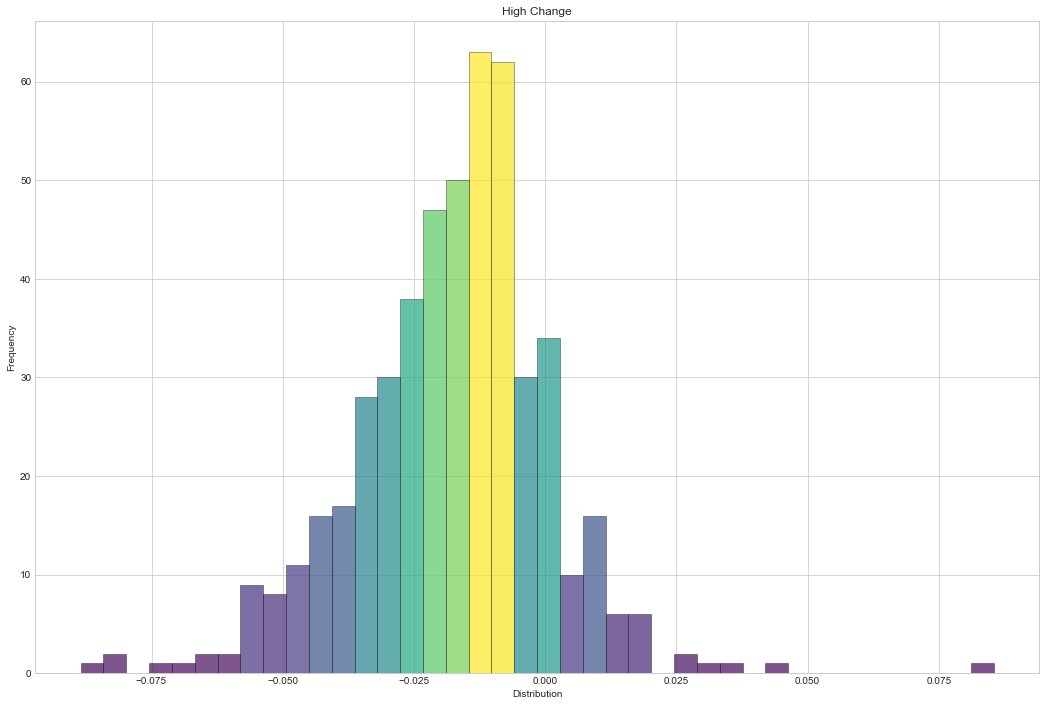

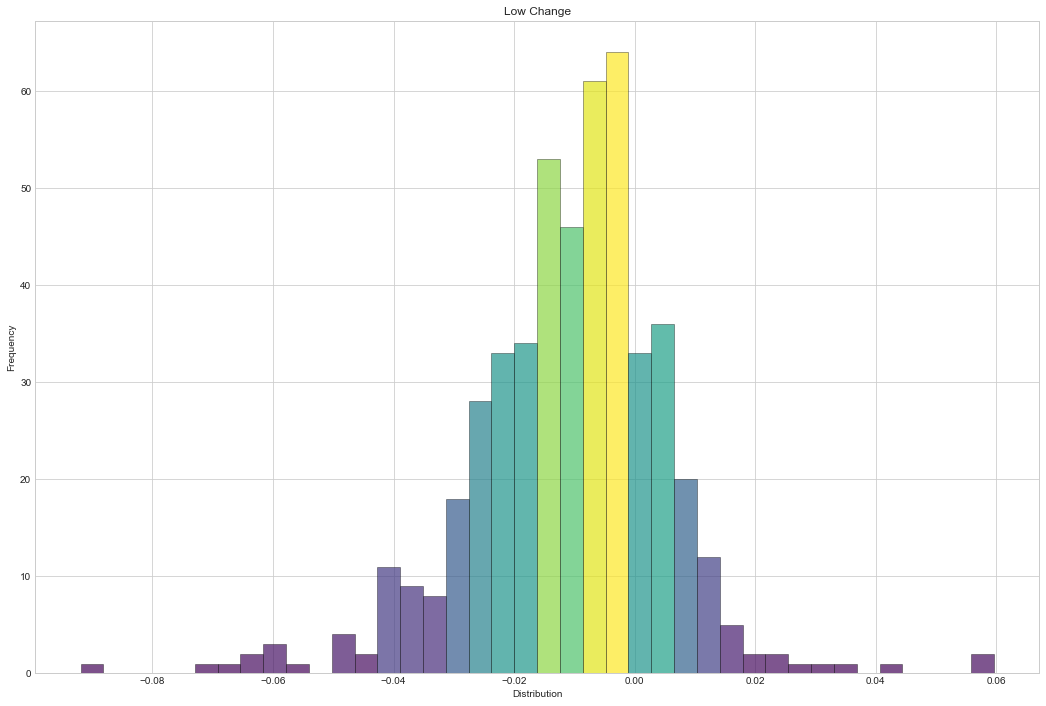

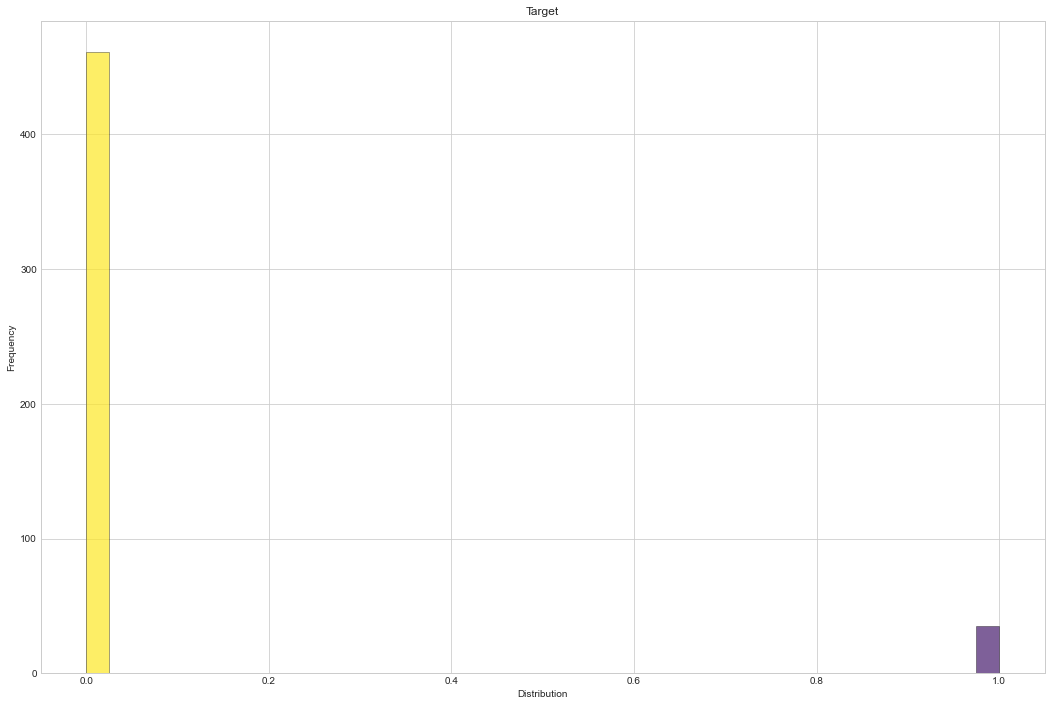

In [22]:
cols = df.columns
for col in cols:
    if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
        plt.figure(figsize=(18,12)) 
        plt.style.use('seaborn-whitegrid')
        n, bins, patches = plt.hist(df[f'{col}'], bins=40, facecolor='#000000', edgecolor='#000000', linewidth=0.5, alpha=0.7)
        n = n.astype('int')
        for i in range(len(patches)):
            patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))    

        plt.title(f'{col}', fontsize=12)
        plt.xlabel('Distribution', fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.show()

## a 3 colored graph representing 3 differently valued days to compare the variance

Unnamed: 0


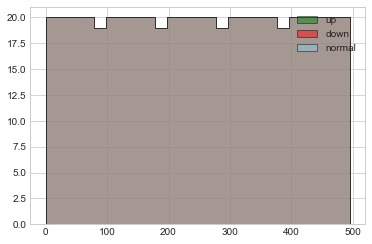

ma50


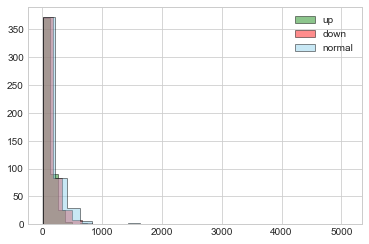

ma200


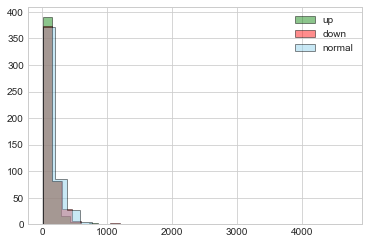

ADX


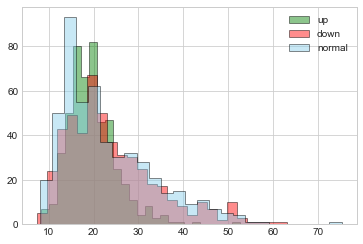

ADXR


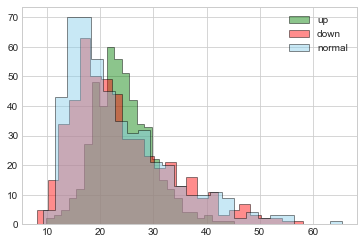

AROONOSC


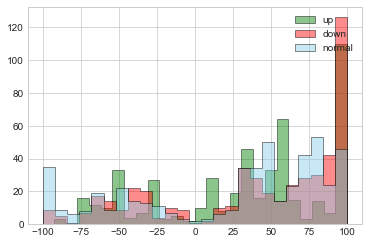

stochK


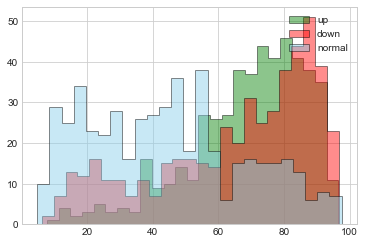

stochD


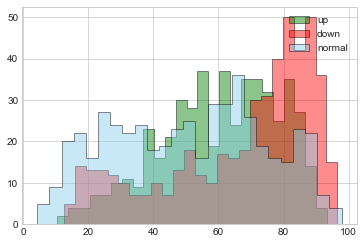

TRIX


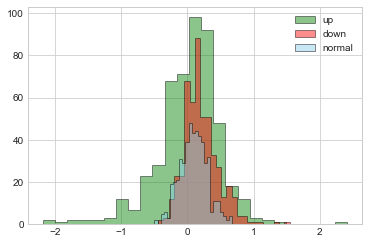

ULTOSC


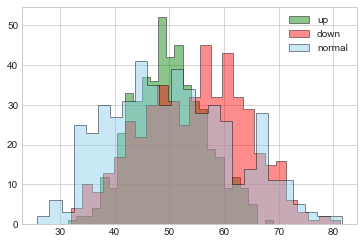

MACD


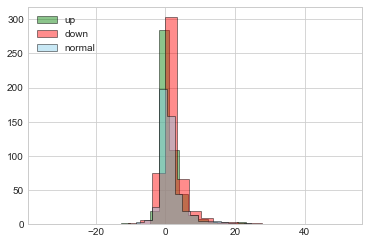

MACDSIG


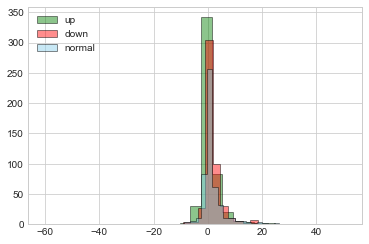

MACDHIST


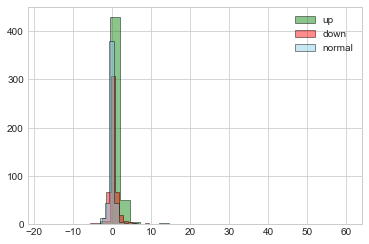

TRANGE


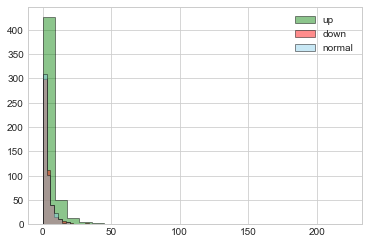

BBupperband


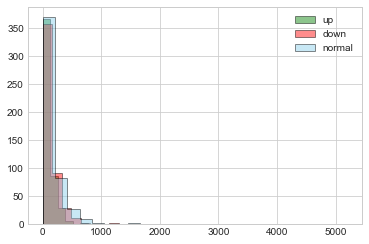

BBmiddleband


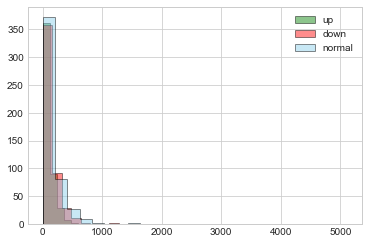

BBlowerband


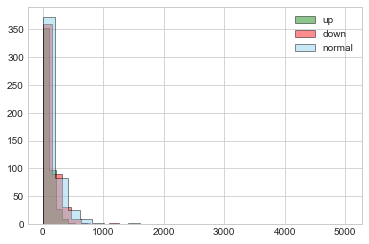

apo


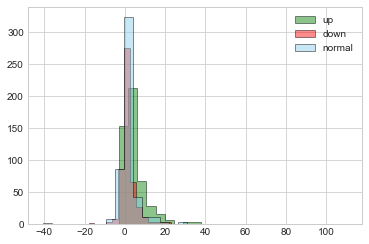

cci


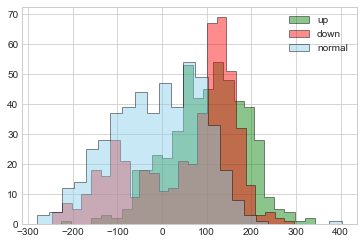

cfo


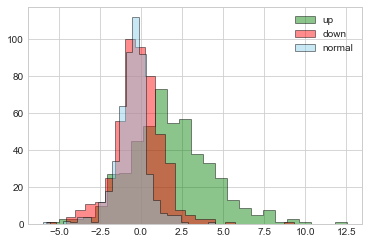

cmo


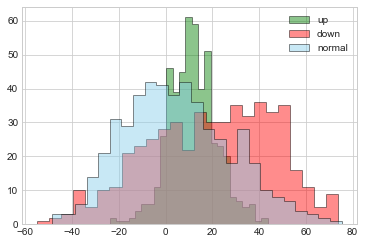

cti


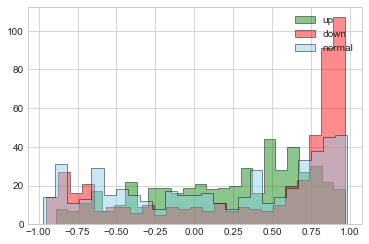

mom


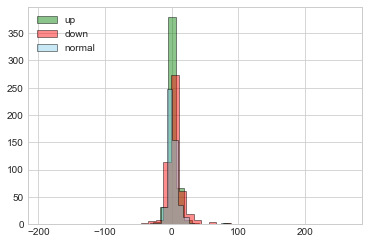

roc


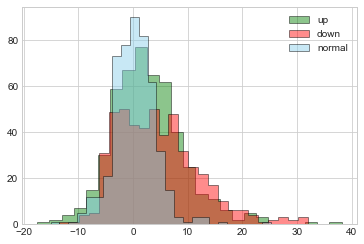

rsi


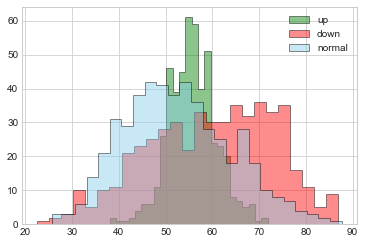

rsx


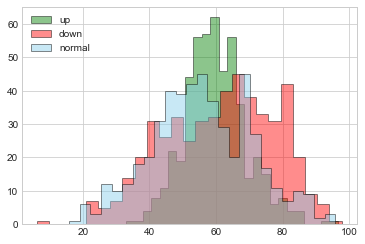

willr


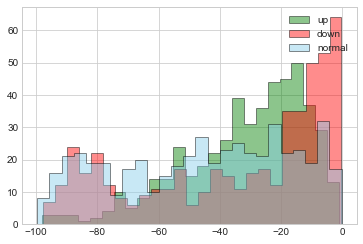

wma


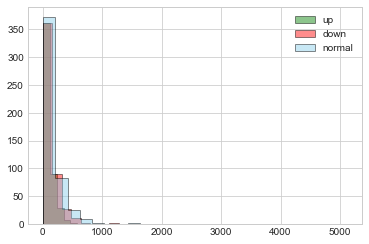

tema


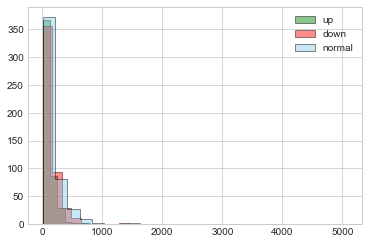

atr


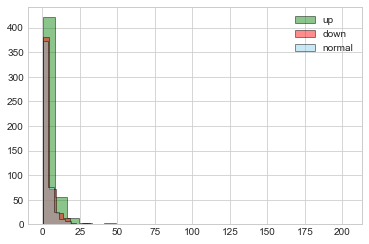

rvi


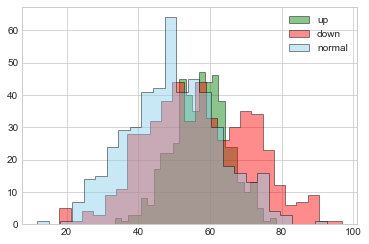

VIX


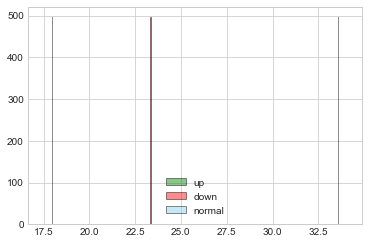

VXN


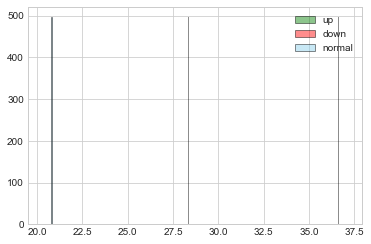

Market Cap


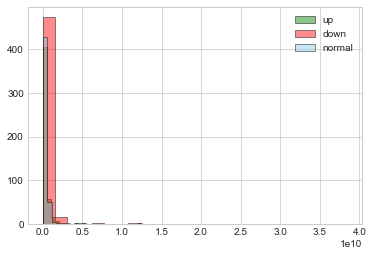

DPC


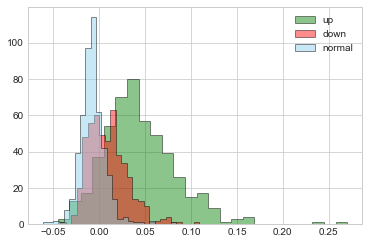

Cumulative Return


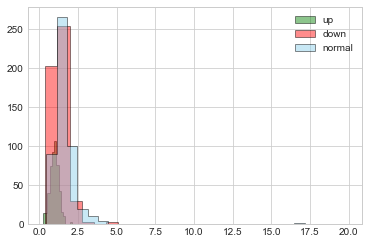

PriceUp


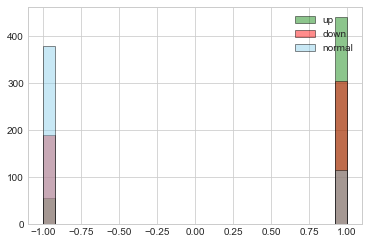

Close Change


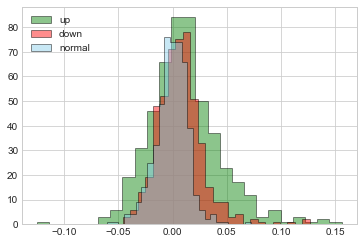

Open Change


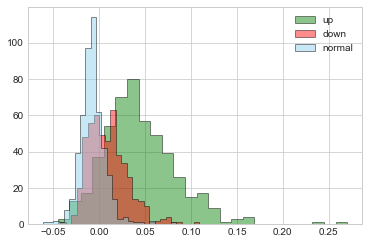

High Change


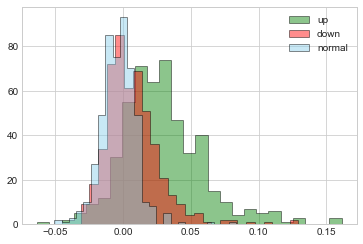

Low Change


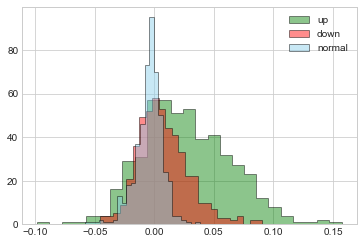

Target


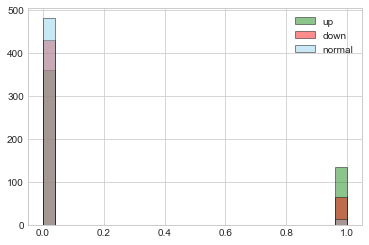

AD_difference


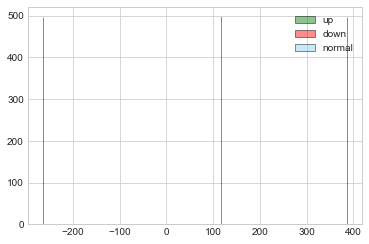

AD_RATIO


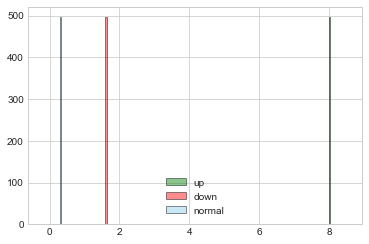

mcclellanSUM


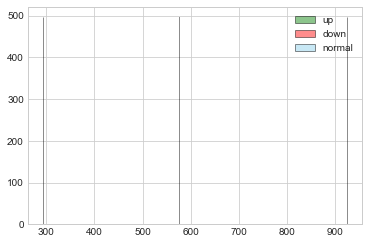

mcclellanOSC


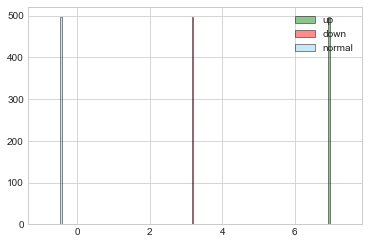

ma50-1


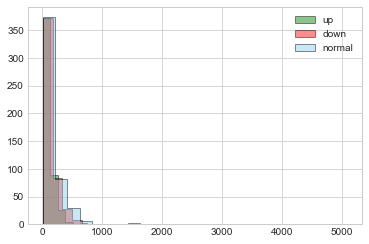

ma200-1


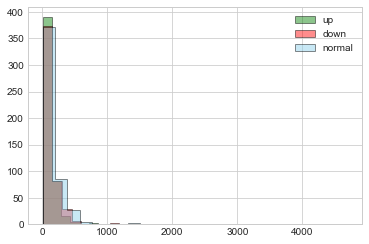

ADX-1


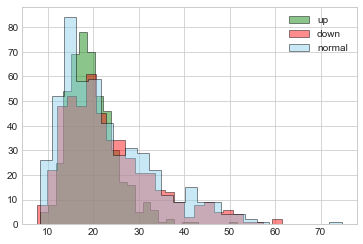

ADXR-1


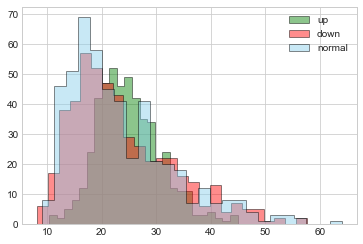

AROONOSC-1


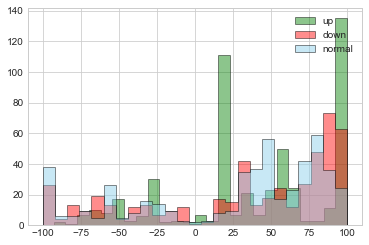

stochK-1


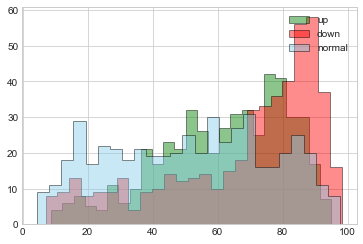

stochD-1


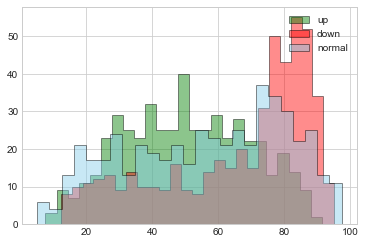

TRIX-1


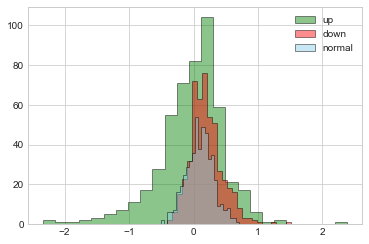

ULTOSC-1


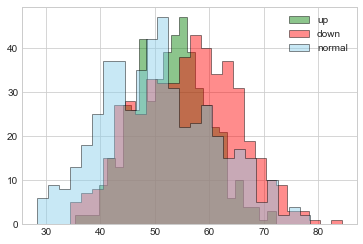

MACD-1


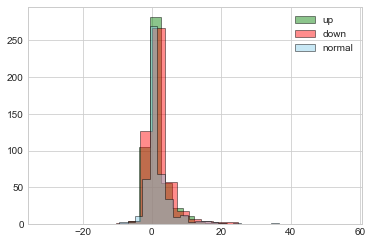

MACDSIG-1


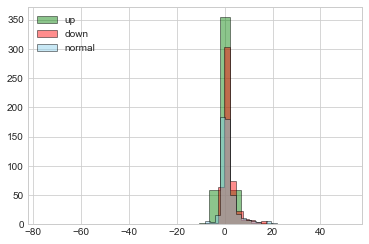

MACDHIST-1


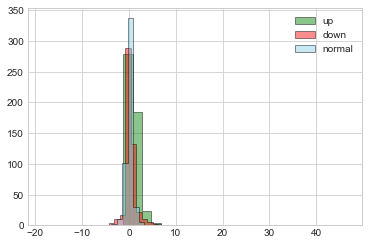

TRANGE-1


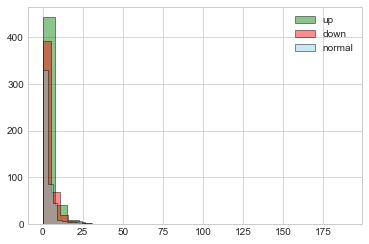

BBupperband-1


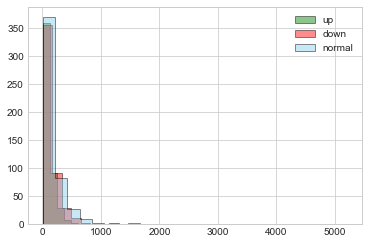

BBmiddleband-1


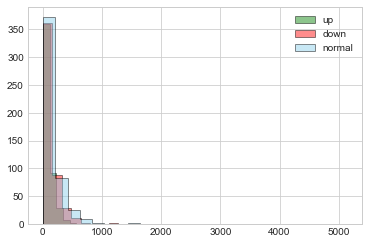

BBlowerband-1


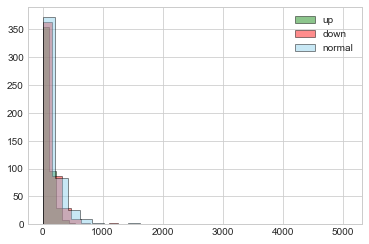

apo-1


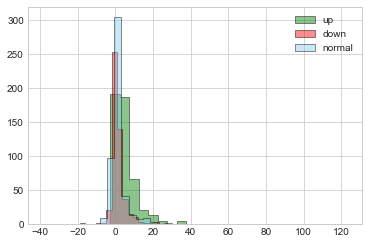

cci-1


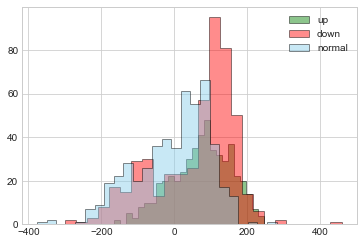

cfo-1


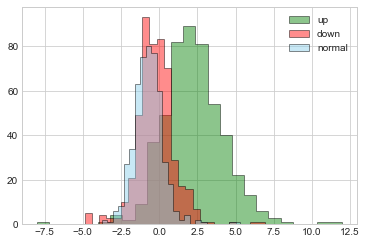

cmo-1


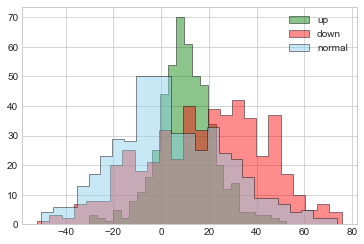

cti-1


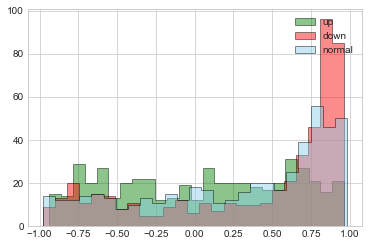

mom-1


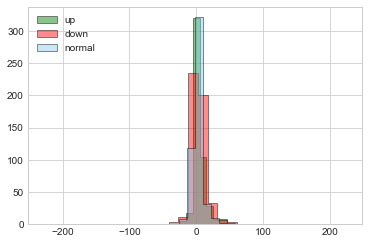

roc-1


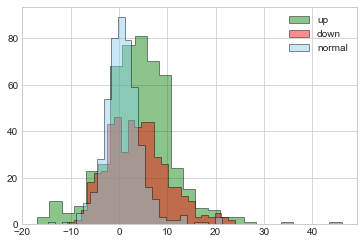

rsi-1


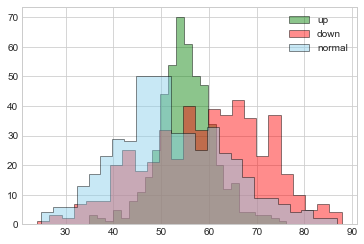

rsx-1


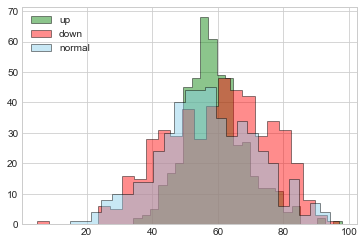

willr-1


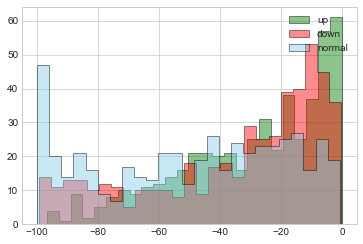

wma-1


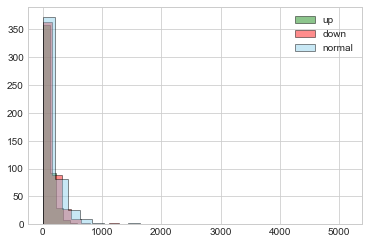

tema-1


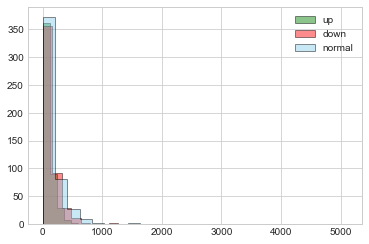

atr-1


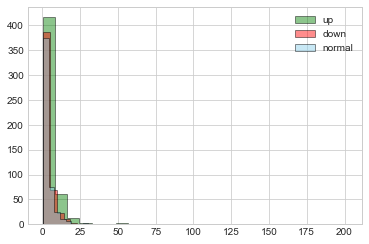

rvi-1


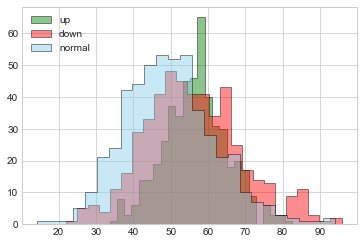

VIX-1


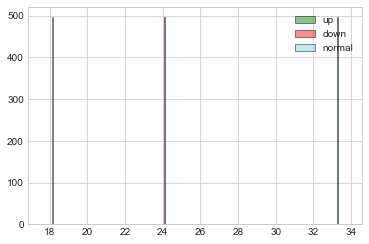

VXN-1


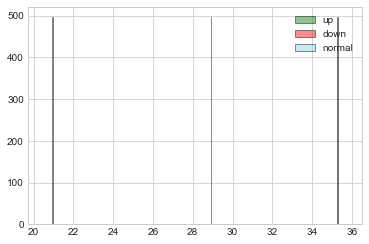

Market Cap-1


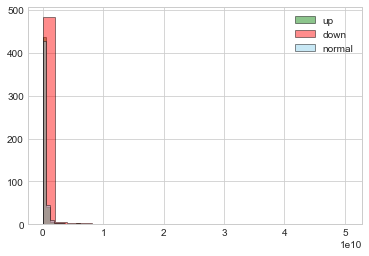

DPC-1


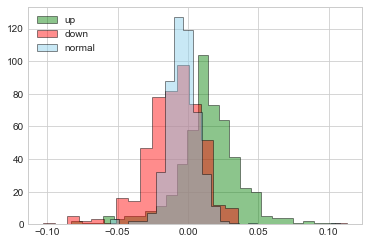

Cumulative Return-1


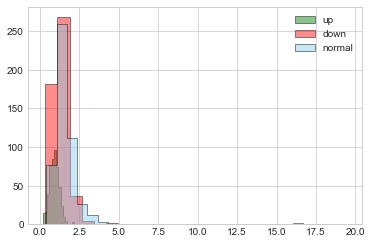

PriceUp-1


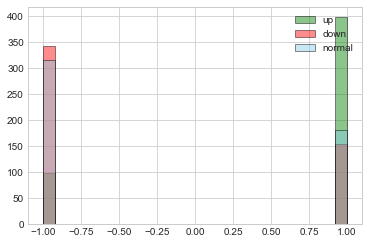

Close Change-1


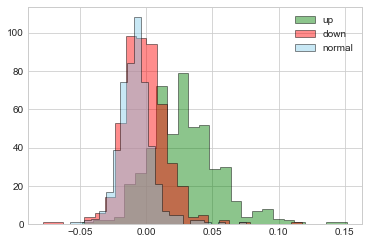

Open Change-1


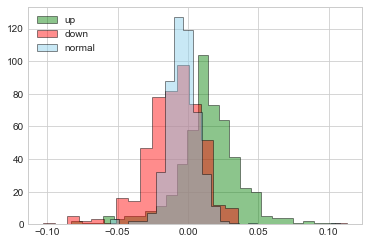

High Change-1


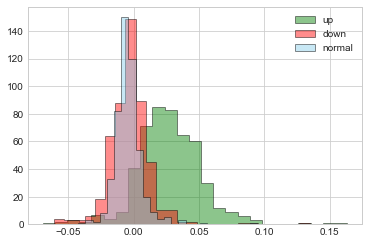

Low Change-1


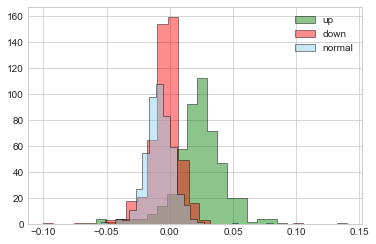

Target-1


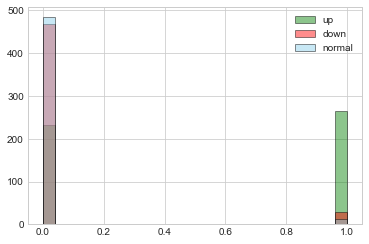

AD_difference-1


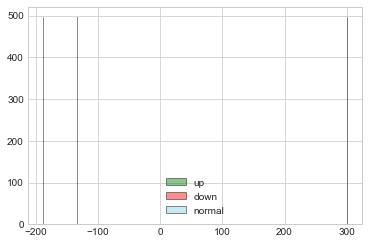

AD_RATIO-1


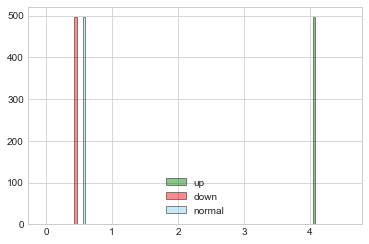

mcclellanSUM-1


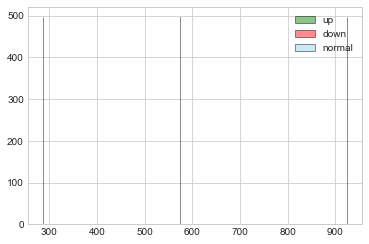

mcclellanOSC-1


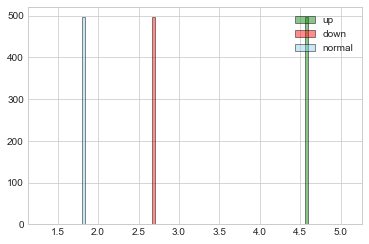

ma50-2


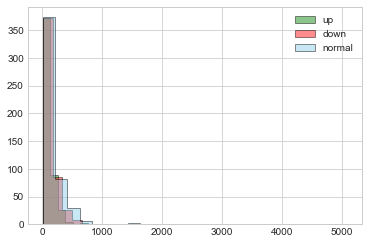

ma200-2


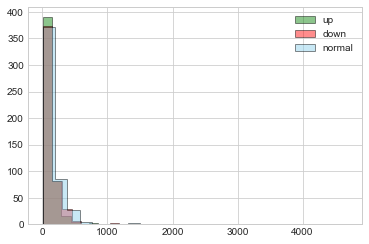

ADX-2


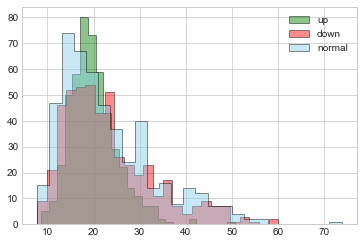

ADXR-2


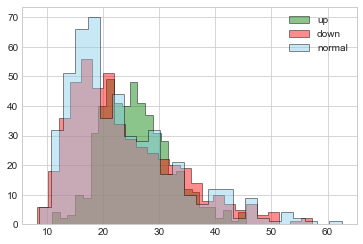

AROONOSC-2


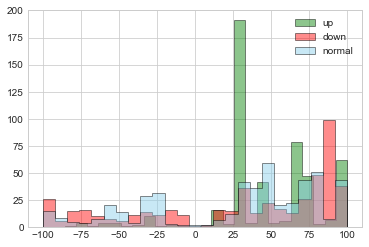

stochK-2


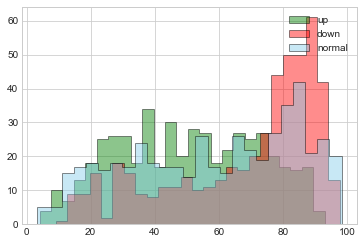

stochD-2


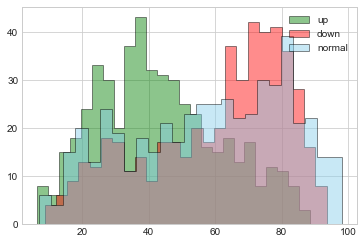

TRIX-2


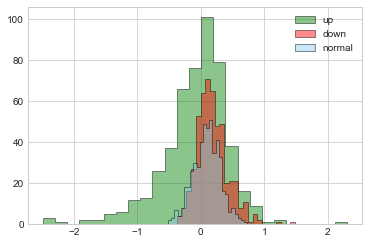

ULTOSC-2


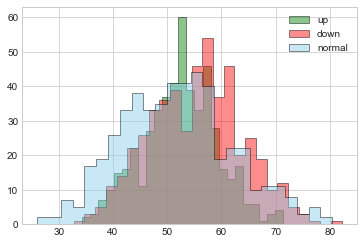

MACD-2


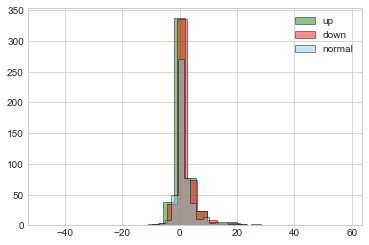

MACDSIG-2


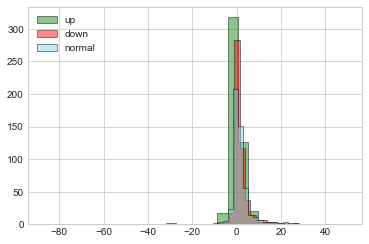

MACDHIST-2


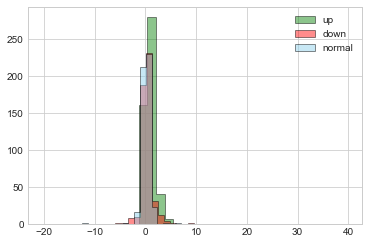

TRANGE-2


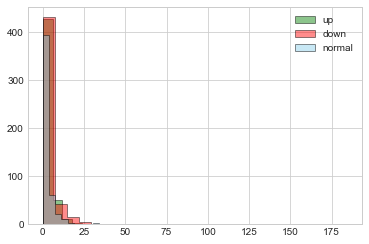

BBupperband-2


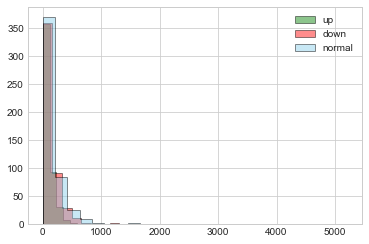

BBmiddleband-2


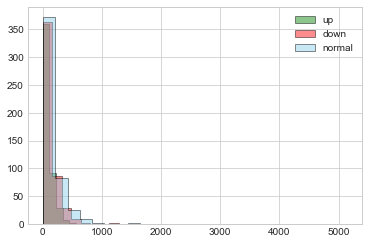

BBlowerband-2


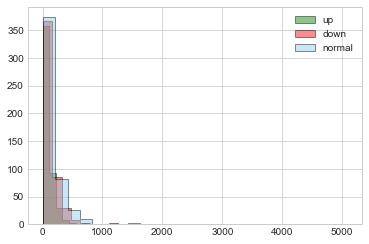

apo-2


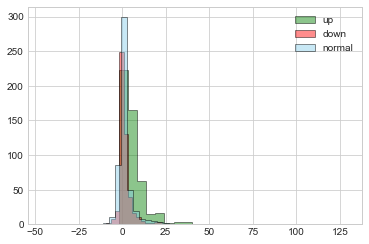

cci-2


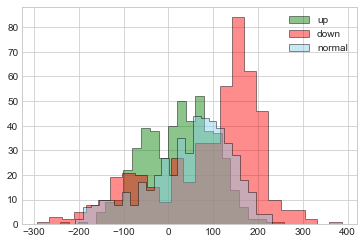

cfo-2


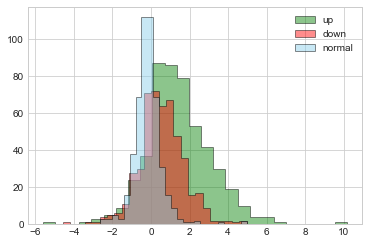

cmo-2


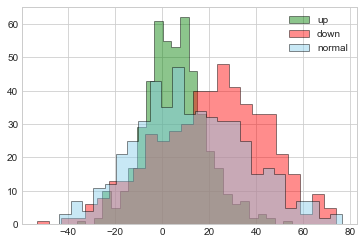

cti-2


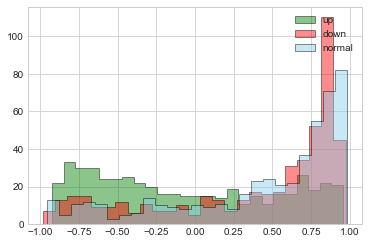

mom-2


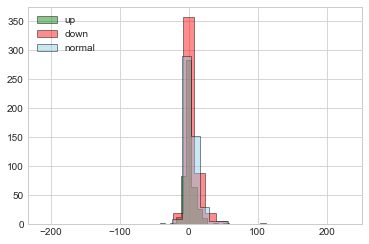

roc-2


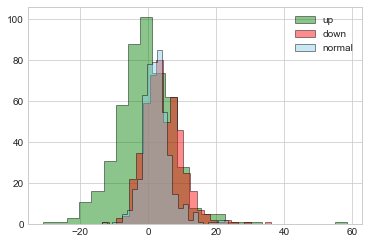

rsi-2


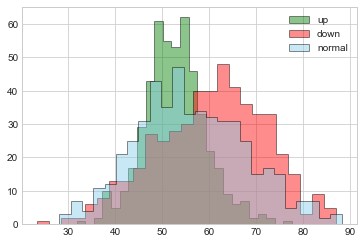

rsx-2


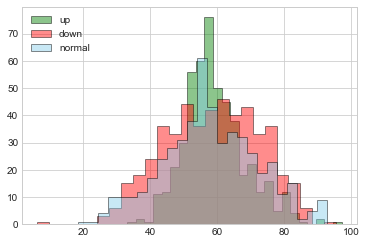

willr-2


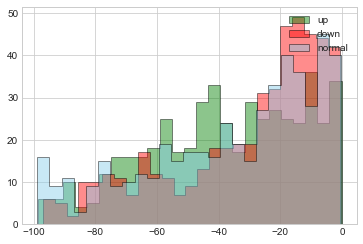

wma-2


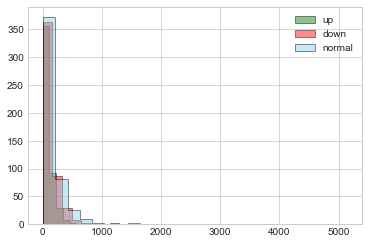

tema-2


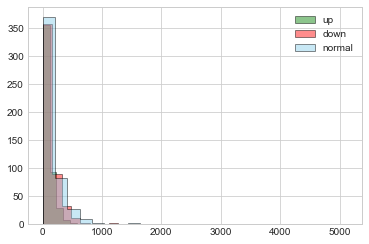

atr-2


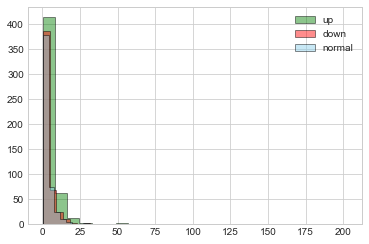

rvi-2


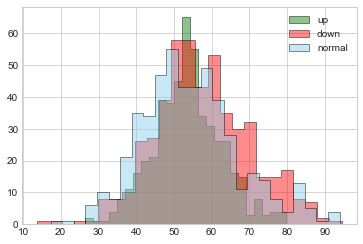

VIX-2


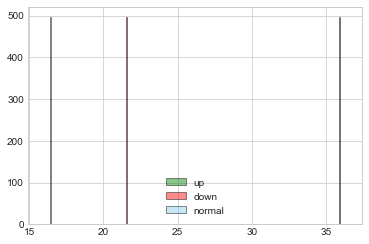

VXN-2


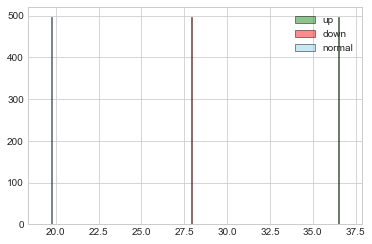

Market Cap-2


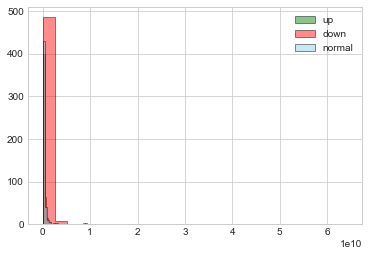

DPC-2


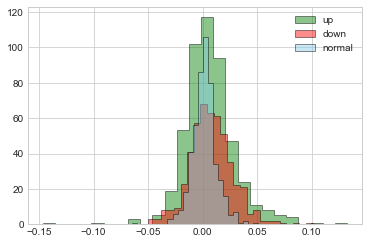

Cumulative Return-2


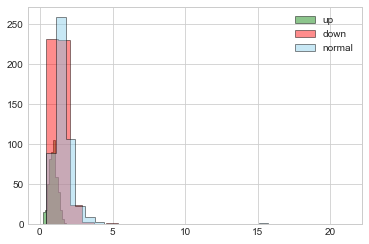

PriceUp-2


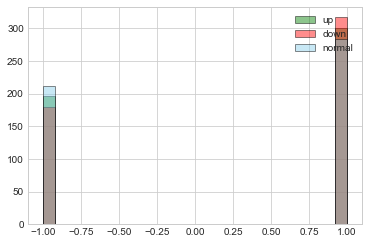

Close Change-2


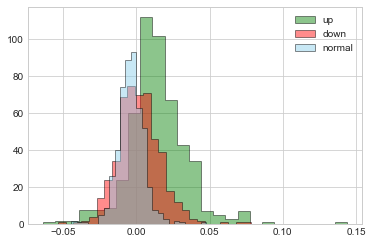

Open Change-2


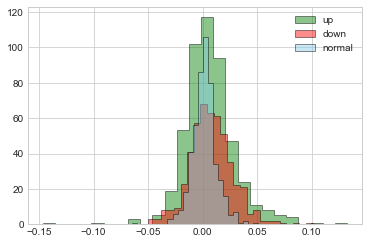

High Change-2


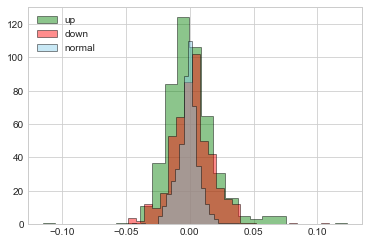

Low Change-2


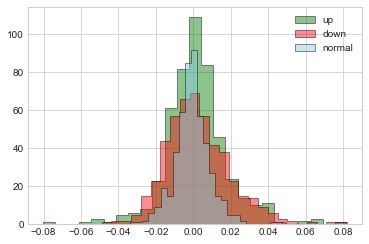

Target-2


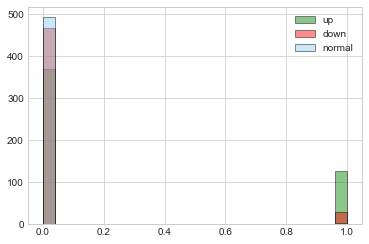

AD_difference-2


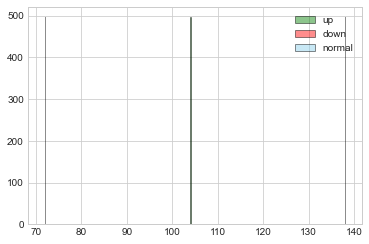

AD_RATIO-2


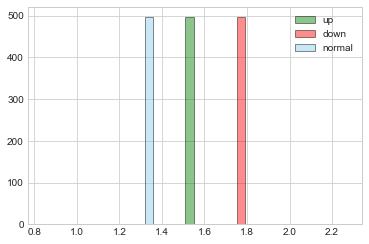

mcclellanSUM-2


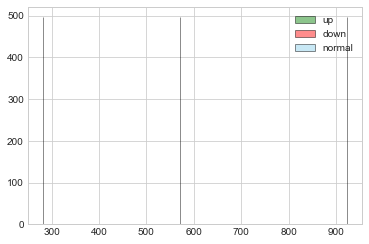

mcclellanOSC-2


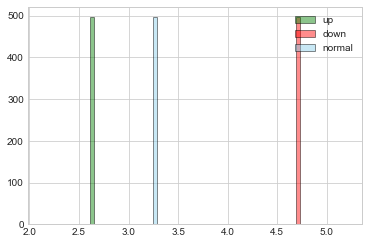

ma50-3


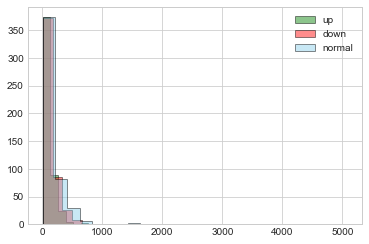

ma200-3


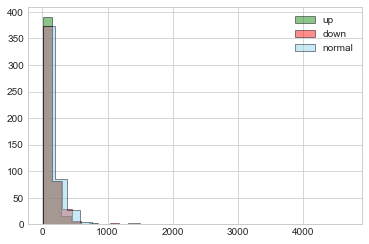

ADX-3


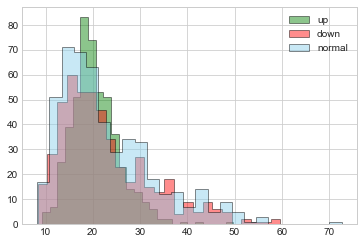

ADXR-3


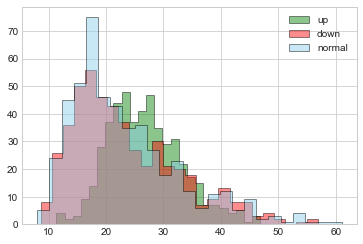

AROONOSC-3


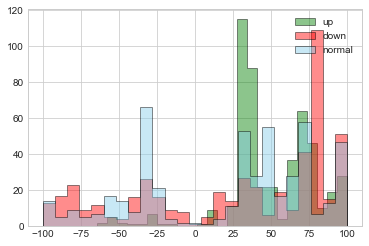

stochK-3


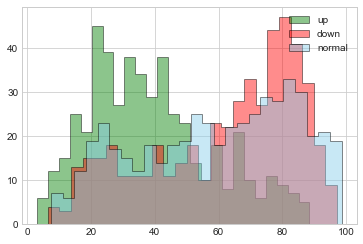

stochD-3


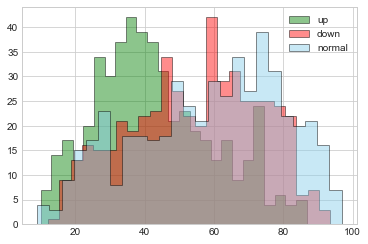

TRIX-3


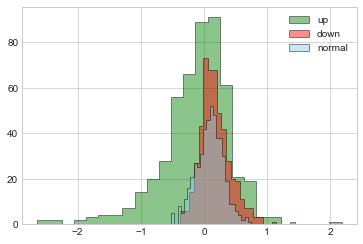

ULTOSC-3


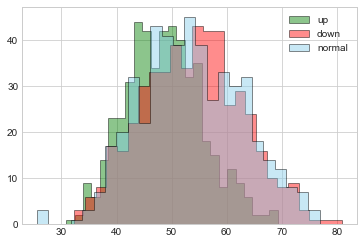

MACD-3


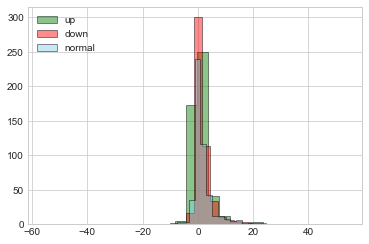

MACDSIG-3


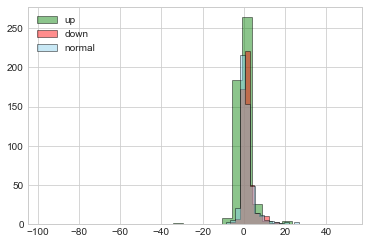

MACDHIST-3


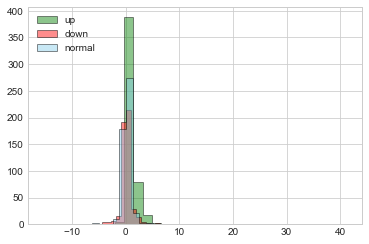

TRANGE-3


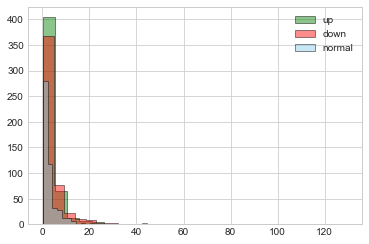

BBupperband-3


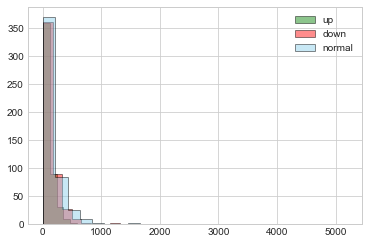

BBmiddleband-3


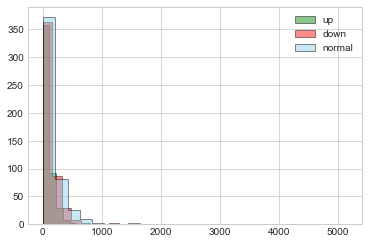

BBlowerband-3


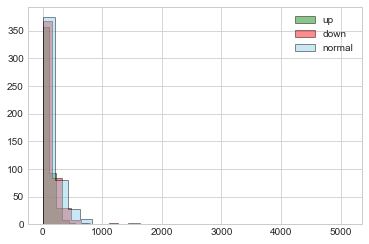

apo-3


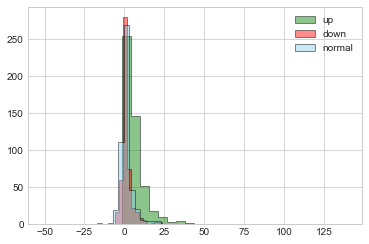

cci-3


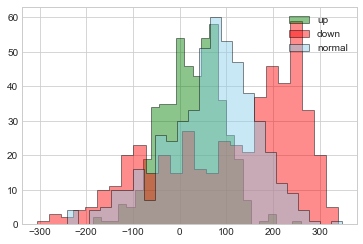

In [23]:
up_trend_df = pd.read_csv('./data/dates/2020-04-28.csv')
down_trend_df = pd.read_csv('./data/dates/2021-01-12.csv')
bearly_changed_df = pd.read_csv('./data/dates/2021-09-08.csv')
cols = up_trend_df.columns
cols = cols[:155]
for col in cols:
    if "CDL" not in col and "Date" not in col and "ticker" not in col:
        print(col)
        kwargs = dict(histtype='stepfilled', alpha=0.45, bins=25, lw = 1,edgecolor='k')
        plt.hist(up_trend_df[col], **kwargs, color = "green", label = "up")
        plt.hist(down_trend_df[col], **kwargs, color = "red", label = "down")
        plt.hist(bearly_changed_df[col], **kwargs, color = "skyblue", label = "normal")
        plt.legend()
        plt.show()

## compute the amound of outliers each column had in all the measured days

In [24]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-26.csv')
cols = df.columns[:42]

dates_list,stocks_tickers = [],[]
d = {} 

for col in cols:
     if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
        d[col] = 0  
    
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(f'./data/dates/{date}.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            d[col] += len(find_outliers_IQR(df[col]))

sorted_value_index = np.argsort(d.values())
dictionary_keys = list(d.keys())
sorted_dict = {dictionary_keys[i]: sorted(d.values())[i] for i in range(len(dictionary_keys))}

for key, value in sorted_dict.items():
    print(key, ':', value)


FileNotFoundError: [Errno 2] No such file or directory: './data/dates/2021-12-07.csv'

## creates a bar graph of those values

In [ ]:
plt.bar(sorted_dict.keys(), sorted_dict.values(), color='g')
plt.rcParams["figure.figsize"] = (120,40)
plt.savefig('graph1.png')

## calculate the amount of errors for each ticker

In [ ]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

df = pd.read_csv('./data/dates/2021-02-26.csv')
cols = df.columns[:42]

dates_list,stocks_tickers = [],[]
error_per_stock = {} 
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        stocks_tickers.append(x)
        
for ticker in stocks_tickers:
    error_per_stock[ticker] = 0  
    

with open('./data/dates.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        dates_list.append(x)
        
for date in dates_list:
    df = pd.read_csv(f'./data/dates/{date}.csv')
    for col in cols:
        if "CDL" not in col and "Date" not in col and "ticker" not in col and "Unnamed" not in col:
            outs = find_outliers_IQR(df[col]).axes
            ticks = df.iloc[outs[0]]['ticker'].tolist()
            for tick in ticks:
                error_per_stock[tick] = error_per_stock[tick] + 1 

            

for key, value in error_per_stock.items():
    print(key, ':', value)

### rereive the beta values of each stock in the S&P

In [ ]:
import yfinance as yf
import numpy as np
stocks_betas = {}    
tickers = []
with open('./data/tickers.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        tickers.append(x)        
tickers.append('^GSPC') 
data = yf.download(tickers, period='5y', interval='1mo')['Adj Close'] 
data = data.dropna(how='all')

log_returns = np.log(data / data.shift())
cov = log_returns.cov()
var = log_returns['^GSPC'].var()
for tick in tickers:
    stocks_betas[tick] = cov.loc[tick, '^GSPC'] / var


In [ ]:
from collections import defaultdict

dd = defaultdict(list)

for dt in (error_per_stock, stocks_betas): 
    for key, value in dt.items():
        dd[key].append(value)
        


# final resualt showing the amount of errors and the beta value side by side 

In [ ]:
ds = {k: v for k, v in sorted(dd.items(), key=lambda item: item[1])}
for key, value in ds.items():
    print(key, ':', value)

